In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import patches
from matplotlib import cm
import ImageManipulation as IM
import os
from scipy.optimize import curve_fit
import pandas as pd
from PIL import Image
from importlib import reload

bugtest written function \n
test for correct peak finding\n
possible problem: initial parameters not intelligently set, may find wrong data.\n
integrate into existing code base\n
run over all data.\n

In [2]:
roifiles = ['CLR1_Yellow Photons.roi',
           'CLR5_Yellow Photons.roi',
           'CLR6_Yellow Photons.roi',
           'CLR7_Yellow Photons.roi',
           'CLR8_Yellow Photons.roi',
           'CLR9_Yellow Photons.roi',
           'CLR10_Yellow Photons.roi',
           'CLR11_Yellow Photons.roi',
           'CLR18_Yellow Photons.roi',
           'CLR19_Yellow Photons.roi',
           'CLR20_Yellow Photons.roi']
files = ['CLR1.ptu',
        'CLR5.ptu',
        'CLR6.ptu',
        'CLR7.ptu',
        'CLR8.ptu',
        'CLR9.ptu',
        'CLR10.ptu',
        'CLR11.ptu',
        'CLR18.ptu',
        'CLR19.ptu',
        'CLR20.ptu']

In [16]:
roifiles = ['CLR9_Yellow Photons.roi']
files = ['CLR9.ptu']

roifiles = ['CLR9_Yellow Photons.roi']
files = ['CLR9.ptu']

In [3]:
def fitNrois(image, ROIfile, model, roiSize, outdir, showfig, savefig):
    #load ROI file
    ROIs = np.genfromtxt(ROIfile)
    
    #initialize arrays
    NROIs = ROIs.shape[0] - 1 #last entry contains zeros
    outROI = np.zeros([NROIs*3, 6])
    paramlst = []
    
    j = 0
    #loop over all ROIs
    for i in range(NROIs): 
        #get ROI from image
        identifier = os.path.split(ROIfile)[-1][:-4] + ' ROI %i' %i
        cornery, cornerx = ROIs[i, [0, 2]].astype(np.int)
        xshape, yshape = image.shape[:2]
        if cornerx < 0 or cornery < 0 or cornerx + roiSize >= xshape or cornery + roiSize >= yshape:
            print ('ROI %i touches image border, skipping \n' % i)
            continue
        else:
            ROIsnip = image[cornerx: cornerx + roiSize, cornery: cornery + roiSize]
        
        #execute fit for ROI  
        params = IM.fitImage.fitNGauss(ROIsnip, model, identifier, savefig, showfig, outdir)
        print('info message from bfgs algorithm is %i \n' % int(params[12]))
        outROI[j] = [cornery + int(params[0] + 0.5) - 3,
                    7,
                    cornerx + int(params[1] + 0.5) - 3,
                    7,
                    cornery + int(params[0] + 0.5),
                    cornerx + int(params[1] + 0.5)] 
                    #xcorner, xrange, ycorner, yrange, xcenter, ycenter
        j += 1
        if model == 'two2DGaussian_py' or model == 'two2DGaussian_c':
            outROI[j] = [cornery + int(params[6] + 0.5) - 3,
                            7, 
                            cornerx + int(params[7] + 0.5) - 3,
                            7,
                            cornery + int(params[6] + 0.5),
                            cornerx + int(params[7] + 0.5)] 
            j+= 1
        if model == 'three2DGaussian_py' or model == 'three2DGaussian_c':
            outROI[j] = [cornery + int(params[9] + 0.5) - 3,
                            7, 
                            cornerx + int(params[10] + 0.5) - 3,
                            7,
                            cornery + int(params[9] + 0.5),
                            cornerx + int(params[10] + 0.5)] 
            j+= 1
        paramlst.append(params)
    #save output
    np.savetxt(os.path.join(outdir, outname), outROI, fmt = '%d', delimiter = '\t')
        
    return paramlst

In [193]:
reload(IM)

<module 'ImageManipulation' from 'K:\\vanderVoortN\\FRC\\Code\\ImageManipulation.py'>

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR1.txt'
number of records is 3209698
ROI 0 touches image border, skipping 

CLR1_Yellow Photons ROI 1 attempt 0: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 1 attempt 1: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 1 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 1 attempt 3: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 1 attempt 4: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 1 attempt 5: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 1 attempt 6: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 1 attempt 7: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 1 attempt 8: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 1 attempt 9: c routine returned info 1, trying again
CLR1_Yellow P

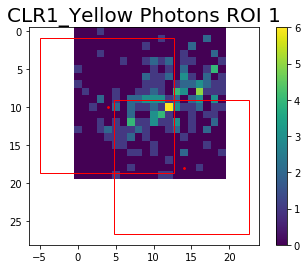

info message from bfgs algorithm is -1 

CLR1_Yellow Photons ROI 2 attempt 0: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 3: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 4: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 7: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 8: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 9: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attempt 10: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 2 attempt 11: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 2 attemp

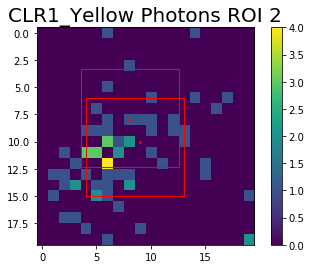

info message from bfgs algorithm is -1 

CLR1_Yellow Photons ROI 3 attempt 0: c routine returned info 2, trying again
CLR1_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 3 attempt 3: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 3 attempt 4: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 3 attempt 5: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 3 attempt 6: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 3 attempt 7: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 3 attempt 8: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 3 attempt 9: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 3 attempt 10: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 3 attempt 11: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 3 atte

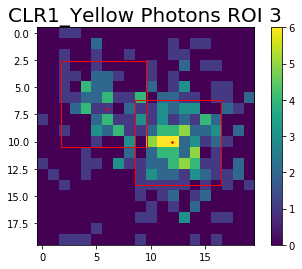

info message from bfgs algorithm is 4 

CLR1_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attempt 1: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attempt 3: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attempt 4: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attempt 5: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attempt 6: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attempt 7: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 4 attempt 8: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 4 attempt 9: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attempt 10: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attempt 11: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 4 attemp

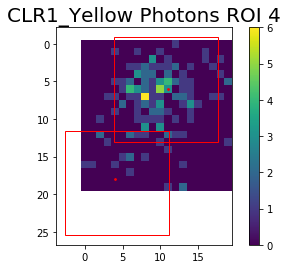

info message from bfgs algorithm is -1 

CLR1_Yellow Photons ROI 5 attempt 0: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 4: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 5: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 6: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 7: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 5 attempt 8: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 9: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 10: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attempt 11: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 5 attemp

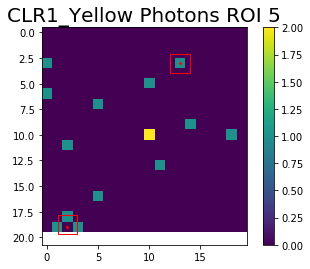

info message from bfgs algorithm is 4 

CLR1_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 6 attempt 1: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 6:value of Istar is 0.73 and Istarthreshold is 0.94, success!


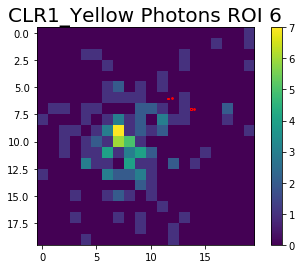

info message from bfgs algorithm is 4 

CLR1_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 7:value of Istar is 0.54 and Istarthreshold is 0.97, success!


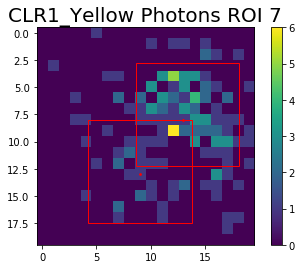

info message from bfgs algorithm is 4 

CLR1_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt 1: c routine returned info 2, trying again
CLR1_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt 3: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt 4: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt 5: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt 6: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt 7: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt 8: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 8 attempt 9: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt 10: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt 11: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 8 attempt

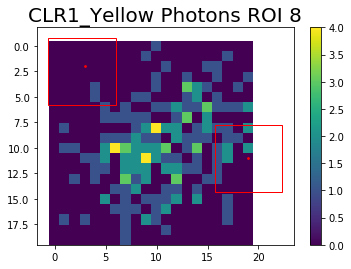

info message from bfgs algorithm is -1 

CLR1_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 9 attempt 1: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 9 attempt 3: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 9 attempt 4: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 9 attempt 5: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 9 attempt 6: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 9 attempt 7: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 9 attempt 8: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 9 attempt 10: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 9 attempt 11: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 9 att

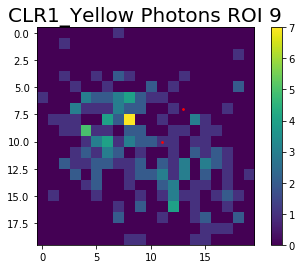

info message from bfgs algorithm is 4 

CLR1_Yellow Photons ROI 10 attempt 0: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 10 attempt 1: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 10 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 10 attempt 7: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 10 attempt 8: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 10 attempt 10: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 10:value of Istar is 0.46 and Istarthreshold is 0.92, success!


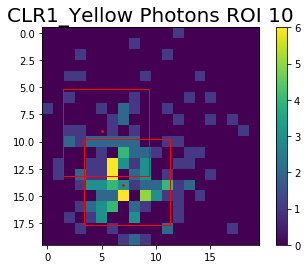

info message from bfgs algorithm is 4 

CLR1_Yellow Photons ROI 11 attempt 0: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 11 attempt 1: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 11 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 11 attempt 3: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 11 attempt 4: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 11 attempt 6: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 11 attempt 7: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 11 attempt 8: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 11 attempt 9: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 11 attempt 10: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 11 attempt 11: c routine returned info 1, trying again
CLR1_Yellow Photons 

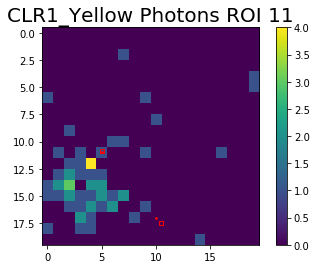

info message from bfgs algorithm is 4 

CLR1_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 1: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 2: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 3: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 4: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 5: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 6: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 7: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 8: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 9: c routine returned info -1, trying again
CLR1_Yellow Photons ROI 12 attempt 10: c routine returned info 1, trying again
CLR1_Yellow Photons ROI 12 attempt 11: c routine returned info 1, trying again
CLR1_Yellow Photons R

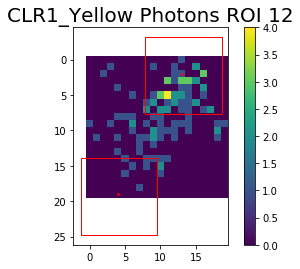

info message from bfgs algorithm is -1 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR5.txt'
number of records is 3644669
CLR5_Yellow Photons ROI 0 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 0 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 0 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 0 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 0 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 0 attempt 5: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 0 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 0 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 0 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 0 attempt 9: c routine returned info -1, trying again
CLR5_Yellow 

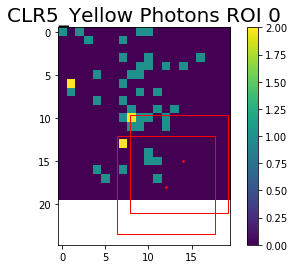

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 1 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 4: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 1 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 1 attemp

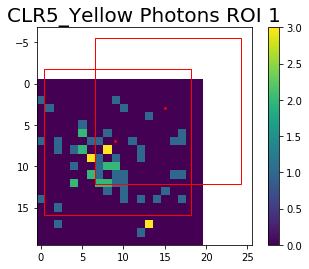

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 2 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attempt 4: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attempt 8: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 2 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 2 attem

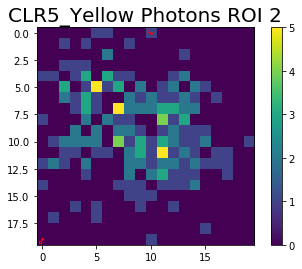

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 9: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 3 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 3 attemp

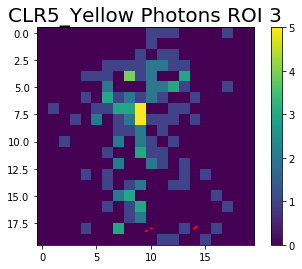

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 4 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 4 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 4 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 4 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 4 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 4 attempt 6: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 4:value of Istar is 0.95 and Istarthreshold is 1.06, success!


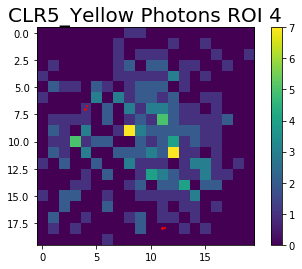

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 5 attempt 0: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 5 attempt 4: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 5 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 5 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 5 attempt 7: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 5 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 5 attempt 9: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 5 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 5 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 5 atte

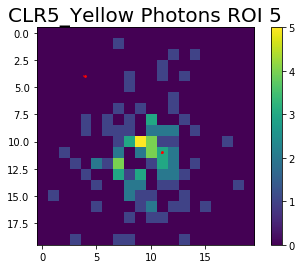

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 6 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 6 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 6 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 6 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 6 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 6:value of Istar is 0.52 and Istarthreshold is 1.00, success!


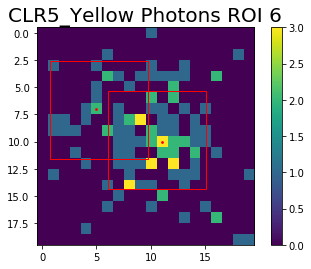

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 7 attempt 1: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 7 attempt 3: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 7 attempt 4: c routine returned info 2, trying again
CLR5_Yellow Photons ROI 7 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 7 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 7 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 7 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 7 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 7 attemp

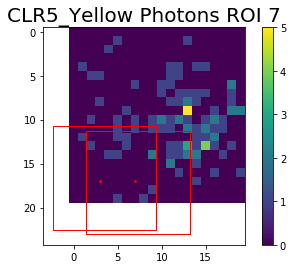

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attempt 4: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 8 attempt 5: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 8 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 8 attem

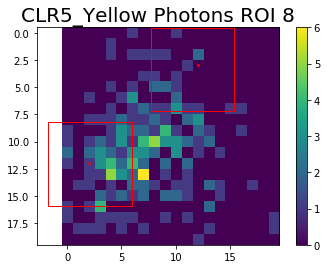

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 9 attempt 1: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 9 attempt 2: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 9 attempt 3: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 9 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 9 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 9 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 9 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 9 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 9 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 9 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 9 atte

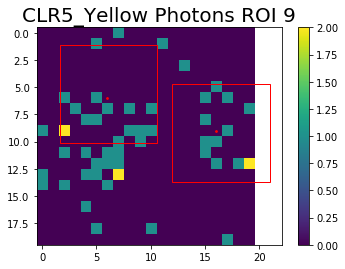

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 6: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 10 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 10 attempt 11: c routine returned info -1, trying again
CLR5_Yellow Photons

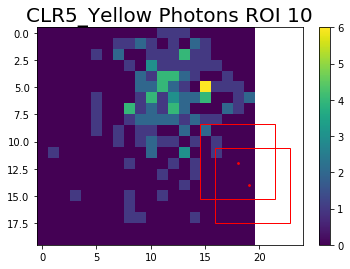

info message from bfgs algorithm is -1 

ROI 11 touches image border, skipping 

CLR5_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 12 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 12 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 12 attempt 3: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 12 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 12 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 12 attempt 6: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 12 attempt 7: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 12 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 12 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 12 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 12 attempt 11: c routine returned

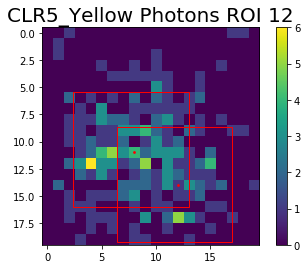

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 13 attempt 1: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 13 attempt 2: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 13 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 13 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 13 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 13 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 13 attempt 7: value of Istar is 0.98 and Istarthreshold is 0.97, trying again
CLR5_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 13 attempt 10: c routine returned info 2, trying again
CLR5_Yellow Photons ROI 13 attempt 11: c routine returned info 1, trying ag

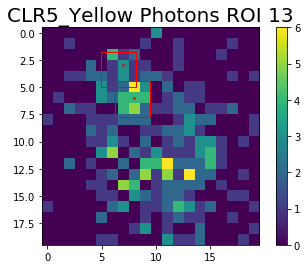

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 14 attempt 1: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 14 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 14 attempt 3: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 14 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 14 attempt 5: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 14 attempt 6: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 14 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 14 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 14 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 14 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 14 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photon

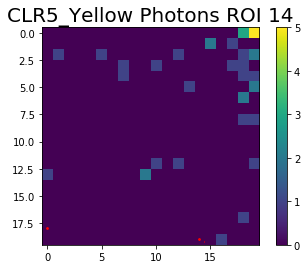

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 15 attempt 3: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 15 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 15 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 15 attempt 7: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 15 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 15 attempt 9: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 15 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 15 attempt 11: c routine returned info -1, trying again
CLR5_Yellow Photon

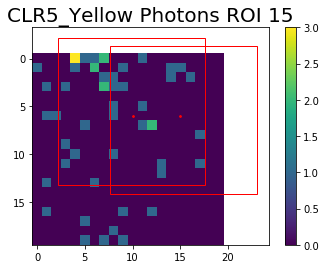

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 16 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 16 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 16:value of Istar is 0.34 and Istarthreshold is 0.92, success!


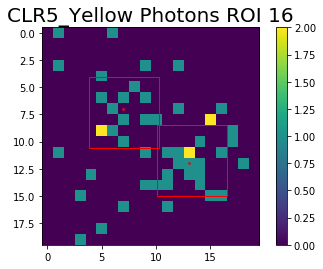

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 17 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 4: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 17 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 17 attempt 11: c routine returned info 2, trying again
CLR5_Yellow Photons R

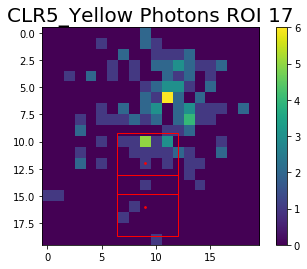

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 9: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 18 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 18 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons 

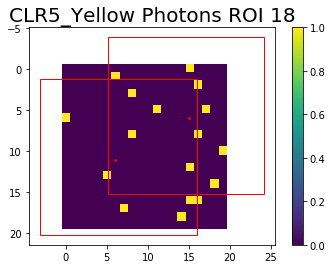

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 19 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 19 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 19 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 19 attempt 3: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 19 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 19 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 19 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 19 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 19 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 19 attempt 9: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 19 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 19 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons

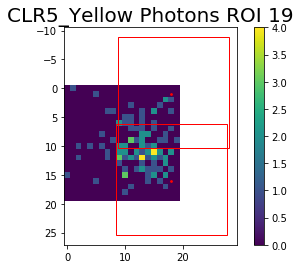

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 20 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 20:value of Istar is 0.78 and Istarthreshold is 1.01, success!


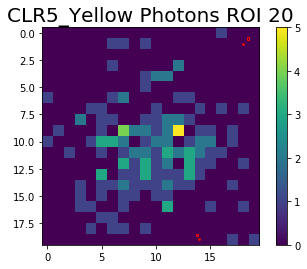

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 21 attempt 0: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 21 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 21 attempt 2: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 21 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 21 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 21 attempt 5: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 21 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 21 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 21 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 21 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 21 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 21 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons

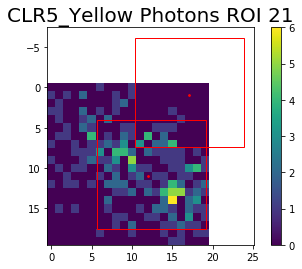

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 22 attempt 0: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 22 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 22 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 22 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 22 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 22 attempt 5: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 22 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 22 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 22:value of Istar is 0.89 and Istarthreshold is 0.97, success!


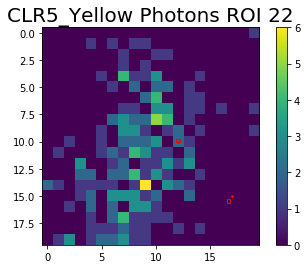

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 23:value of Istar is 0.52 and Istarthreshold is 0.97, success!


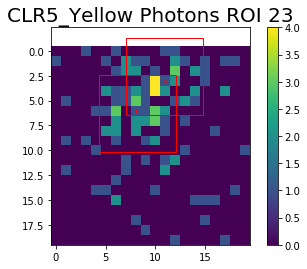

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 24 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 24 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 24 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 24 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 24 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 24 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 24 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 24 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 24 attempt 8: c routine returned info 2, trying again
CLR5_Yellow Photons ROI 24 attempt 9: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 24 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 24 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons R

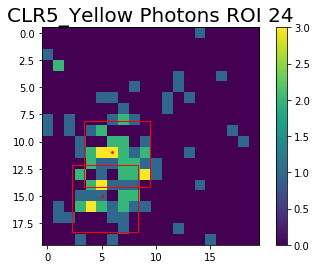

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 25 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 9: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 25 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 25 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons R

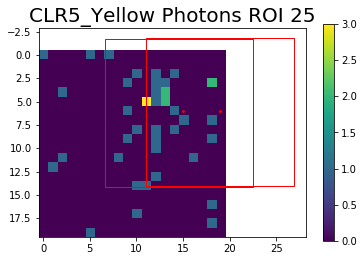

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 26 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 26 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 26 attempt 2: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 26 attempt 5: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 26 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 26 attempt 7: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 26 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 26 attempt 9: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 26 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 26 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photo

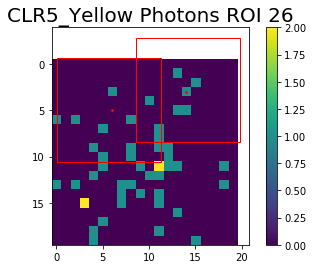

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 27 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 27 attempt 1: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 27 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 27 attempt 3: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 27 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 27 attempt 6: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 27 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 27 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 27 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 27 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 27 attempt 11: c routine returned info 2, trying again
CLR5_Yellow Photon

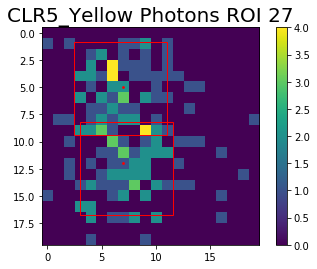

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 28 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 28 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 28 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 28 attempt 3: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 28 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 28 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 28 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 28 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 28 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 28:value of Istar is 0.66 and Istarthreshold is 0.95, success!


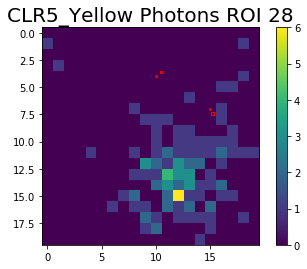

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 29 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 29 attempt 1: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 29 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 29 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 29 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 29 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 29 attempt 6: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 29 attempt 7: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 29 attempt 8: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 29 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 29 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 29 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photon

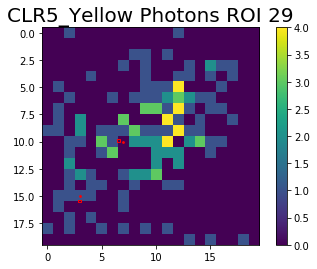

info message from bfgs algorithm is 4 

CLR5_Yellow Photons ROI 30 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 3: c routine returned info -1, trying again
CLR5_Yellow Photons ROI 30 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 30 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons R

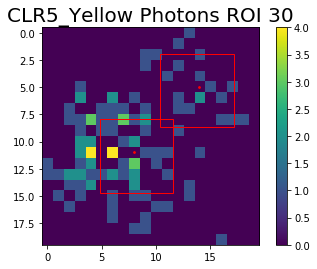

info message from bfgs algorithm is -1 

CLR5_Yellow Photons ROI 31 attempt 0: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 1: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 2: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 3: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 4: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 5: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 6: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 7: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 8: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 9: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 10: c routine returned info 1, trying again
CLR5_Yellow Photons ROI 31 attempt 11: c routine returned info 1, trying again
CLR5_Yellow Photons R

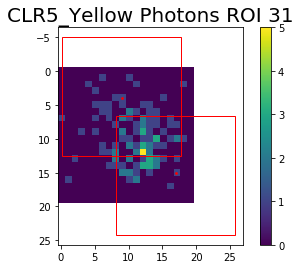

info message from bfgs algorithm is -1 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR6.txt'
number of records is 3681173
CLR6_Yellow Photons ROI 0 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 0:value of Istar is 0.58 and Istarthreshold is 0.98, success!


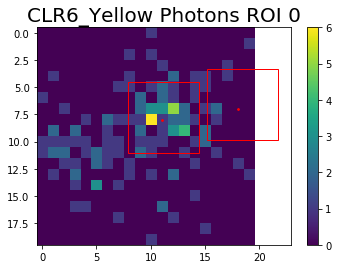

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 1 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 1 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 1 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 1 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 1 attempt 4: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 1 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 1 attempt 6: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 1 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 1 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 1 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 1 attempt 10: c routine returned info 2, trying again
CLR6_Yellow Photons ROI 1 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 1 attemp

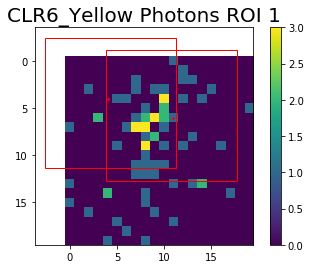

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 2 attempt 0: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 2 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 2 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 2 attempt 7: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 2:value of Istar is 0.51 and Istarthreshold is 1.01, success!


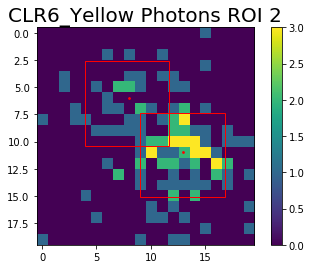

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 3 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 3 attempt 4: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 3 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 3 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 3 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 3 attempt 8: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 3 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 3 attempt 10: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 3 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 3 attem

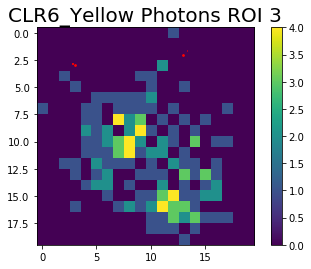

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attempt 6: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 4 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attempt 8: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 4 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 4 attemp

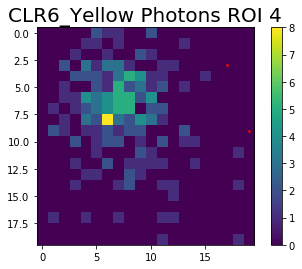

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 5 attempt 0: c routine returned info 2, trying again
CLR6_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 5 attempt 2: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 5 attempt 3: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 5 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 5 attempt 5: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 5 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 5 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 5 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 5 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 5 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 5 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 5:value

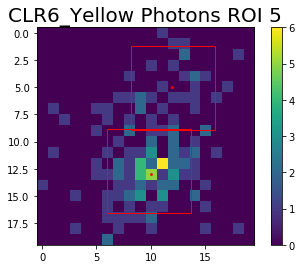

info message from bfgs algorithm is 4 

ROI 6 touches image border, skipping 

CLR6_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 7 attempt 3: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 7 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 7 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 7 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 7 attempt 8: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 7 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 7 attempt 11: c routine returned info 1, trying

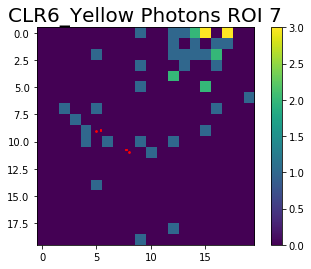

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 8 attempt 1: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 8 attempt 2: c routine returned info 2, trying again
CLR6_Yellow Photons ROI 8:value of Istar is 0.86 and Istarthreshold is 1.01, success!


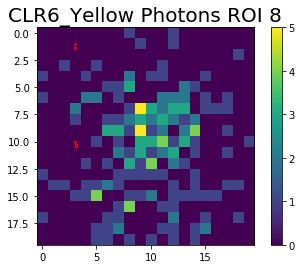

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 9 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 9 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 9 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 9 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 9 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 9 attempt 7: c routine returned info 2, trying again
CLR6_Yellow Photons ROI 9:value of Istar is 0.42 and Istarthreshold is 0.92, success!


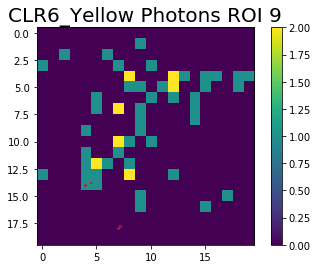

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 10 attempt 2: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 10 attempt 4: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 10 attempt 6: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 10:value of Istar is 0.58 and Istarthreshold is 0.98, success!


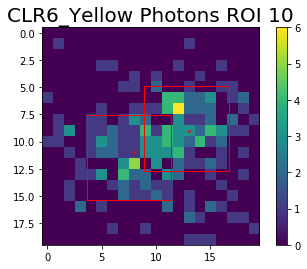

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 11 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 11 attempt 1: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 11 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 11 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 11 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 11 attempt 6: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 11 attempt 7: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 11 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 11 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 11 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 11 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons

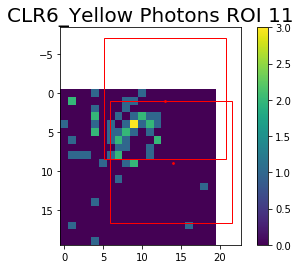

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 1: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 12 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 12 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons 

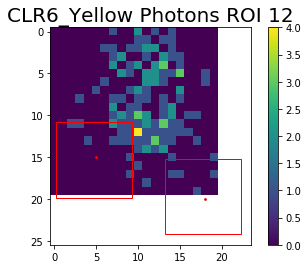

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 13 attempt 1: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 13 attempt 2: c routine returned info 2, trying again
CLR6_Yellow Photons ROI 13 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 13 attempt 4: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 13 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 13 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 13 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 13 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons

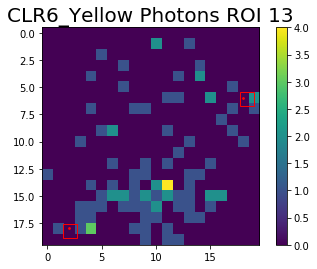

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 14 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 14:value of Istar is 0.49 and Istarthreshold is 0.96, success!


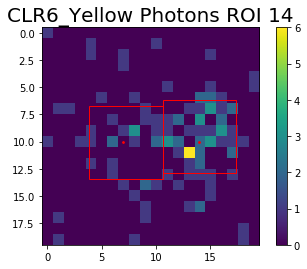

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 15 attempt 1: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 15 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 15 attempt 5: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 15 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 15 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 15 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 15 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 15 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 15 attempt 11: c routine returned info -1, trying again
CLR6_Yellow Photons

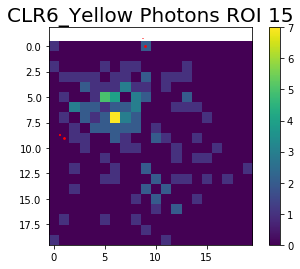

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 16 attempt 0: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 16 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 16 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 16 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 16 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 16 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 16 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 16 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 16 attempt 10: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 16 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons 

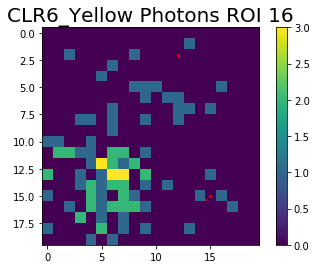

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 17 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 17 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons RO

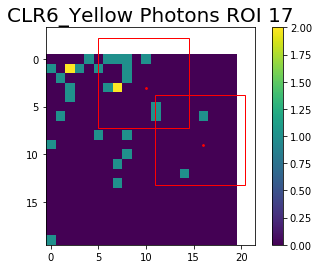

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 18 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons R

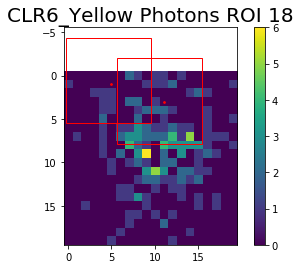

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 19 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 5: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 19 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 19 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons 

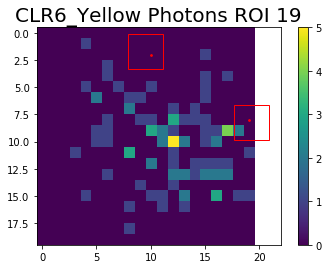

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 20 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 20 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons R

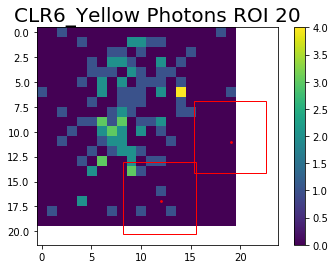

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 21 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 9: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 21 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 21 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons 

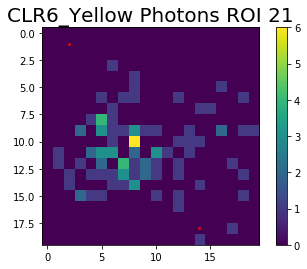

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 22 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 22 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 22 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 22 attempt 3: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 22 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 22 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 22 attempt 6: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 22 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 22 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 22 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 22 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 22 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons 

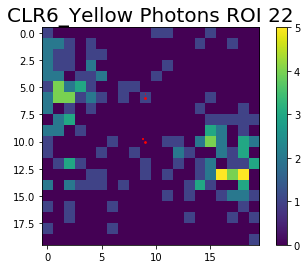

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 23 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 23 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 23 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 23 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 23 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 23 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 23 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 23 attempt 9: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 23 attempt 10: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 23 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons 

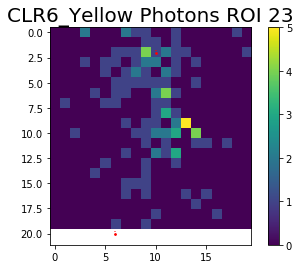

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 24:value of Istar is 0.66 and Istarthreshold is 1.01, success!


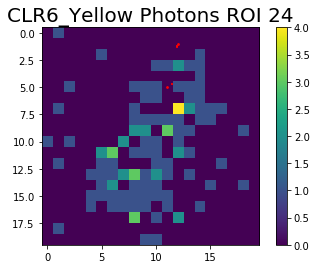

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 25 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 25 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons RO

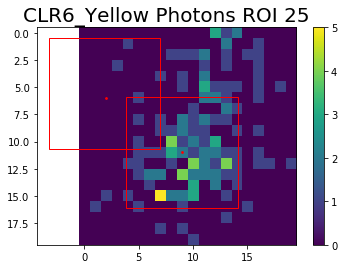

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 26 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 26 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 26 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 26 attempt 4: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 26 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 26:value of Istar is 0.53 and Istarthreshold is 0.94, success!


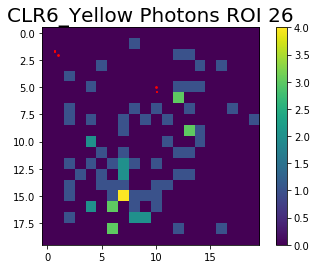

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 27 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 27 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 27 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 27 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 27 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 27 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 27 attempt 7: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 27 attempt 8: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 27 attempt 9: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 27 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 27 attempt 11: c routine returned info -1, trying again
CLR6_Yellow Photon

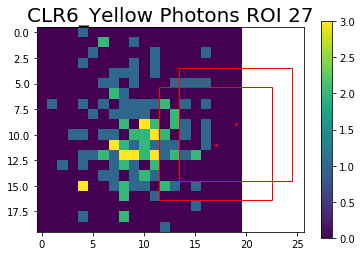

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 28 attempt 0: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 28 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 28 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons 

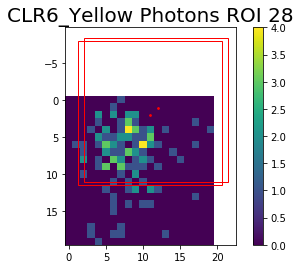

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 29 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 29 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 29 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 29 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 29 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 29 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 29 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 29:value of Istar is 0.44 and Istarthreshold is 0.95, success!


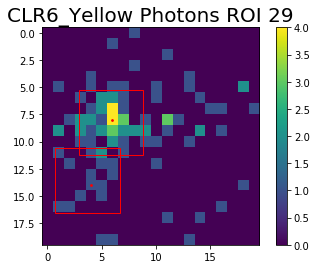

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 30:value of Istar is 0.55 and Istarthreshold is 1.00, success!


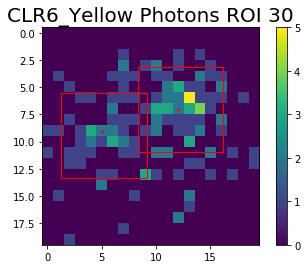

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 31 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 31 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 31 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 31 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 31 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 31 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 31 attempt 6: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 31 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 31 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 31 attempt 9: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 31:value of Istar is 0.69 and Istarthreshold is 0.99, success!


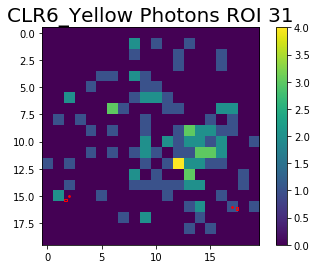

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 32 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 32 attempt 1: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 32 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 32 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 32 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 32 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 32:value of Istar is 0.69 and Istarthreshold is 1.04, success!


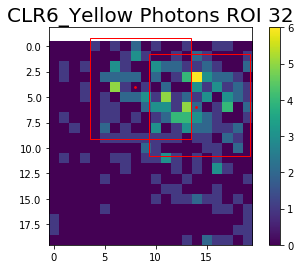

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 33 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 7: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 33 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 33 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons R

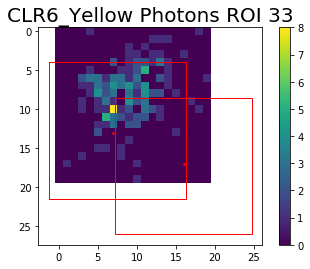

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 34 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 34 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 34 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 34 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 34 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 34 attempt 5: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 34 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 34 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 34 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 34 attempt 9: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 34 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 34 attempt 11: c routine returned info -1, trying again
CLR6_Yellow Photon

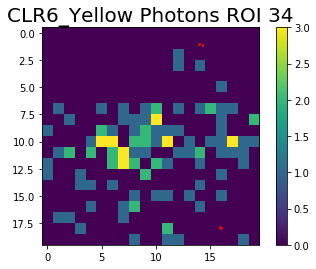

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 35 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 35 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 35 attempt 2: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 35 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 35 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 35 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 35 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 35 attempt 7: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 35 attempt 8: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 35 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 35 attempt 10: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 35 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons 

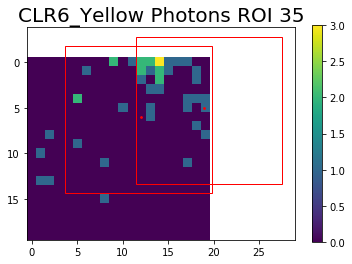

info message from bfgs algorithm is -1 

CLR6_Yellow Photons ROI 36 attempt 0: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 36 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 36 attempt 2: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 36:value of Istar is 0.52 and Istarthreshold is 0.95, success!


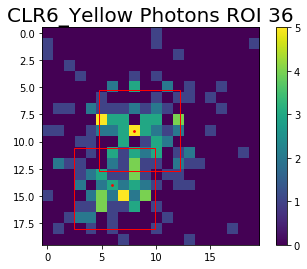

info message from bfgs algorithm is 4 

CLR6_Yellow Photons ROI 37 attempt 0: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 37 attempt 1: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 37 attempt 2: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 37 attempt 3: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 37 attempt 4: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 37 attempt 5: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 37 attempt 6: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 37 attempt 7: c routine returned info 2, trying again
CLR6_Yellow Photons ROI 37 attempt 8: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 37 attempt 9: c routine returned info 1, trying again
CLR6_Yellow Photons ROI 37 attempt 10: c routine returned info -1, trying again
CLR6_Yellow Photons ROI 37 attempt 11: c routine returned info 1, trying again
CLR6_Yellow Photons 

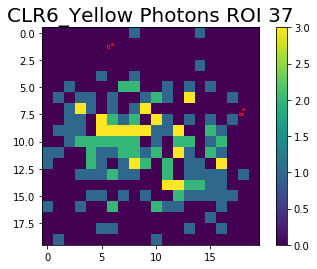

info message from bfgs algorithm is 4 

ROI 38 touches image border, skipping 

ROI 39 touches image border, skipping 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR7.txt'
number of records is 3645173
ROI 0 touches image border, skipping 

ROI 1 touches image border, skipping 

CLR7_Yellow Photons ROI 2 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 2 attempt 1: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 2 attempt 2: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 2 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 2 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 2 attempt 7: c routine returned info 1, trying again
CLR7_Yell

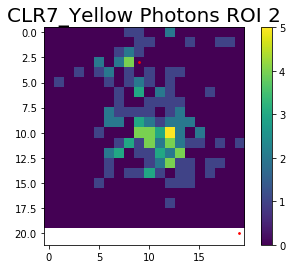

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 7: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 3 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 3 attempt

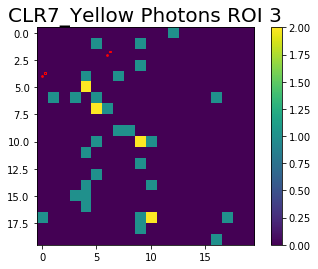

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 2: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 4 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 4 attempt 11: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 4 attemp

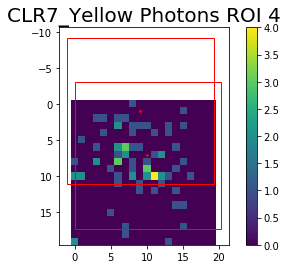

info message from bfgs algorithm is -1 

ROI 5 touches image border, skipping 

CLR7_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 6 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 6 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 6 attempt 3: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 6 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 6 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 6 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 6 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 6 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 6 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 6:value of Istar is 0.11 and Istarthreshold is 0.82, success!


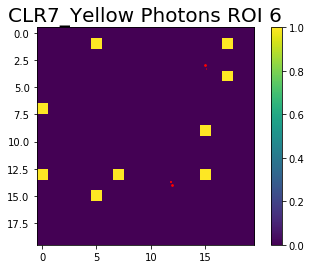

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 7 attempt 2: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 7 attempt 3: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 7 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 7 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 7 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 7 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 7 attempt 10: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 7 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 7 attem

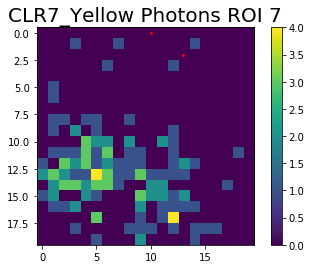

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 8:value of

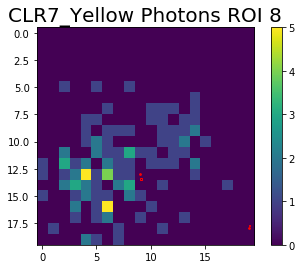

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 9 attempt 0: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 9 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 9 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 9 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 9 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 9 attempt 6: c routine returned info 2, trying again
CLR7_Yellow Photons ROI 9 attempt 7: c routine returned info 2, trying again
CLR7_Yellow Photons ROI 9 attempt 8: c routine returned info 2, trying again
CLR7_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 9 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 9 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 9 attempt

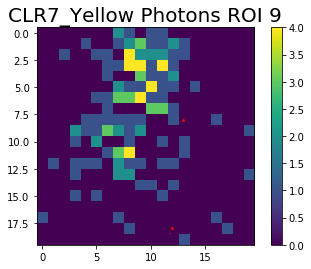

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 10 attempt 0: c routine returned info 2, trying again
CLR7_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 10 attempt 2: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 10 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 10 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 10 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 10 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons R

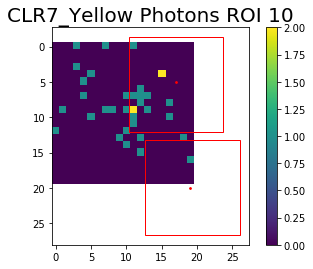

info message from bfgs algorithm is -1 

CLR7_Yellow Photons ROI 11 attempt 0: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 11 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 11 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 11 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 11 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 11 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 11 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 11 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 11 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 11 attempt 10: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 11 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons

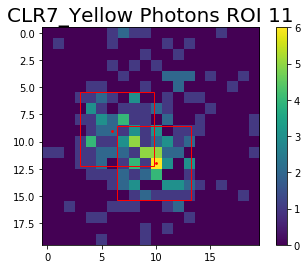

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 12 attempt 0: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 12 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 12 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 12 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 12 attempt 4: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 12 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 12 attempt 6: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 12 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 12 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 12 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 12 attempt 10: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 12 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photon

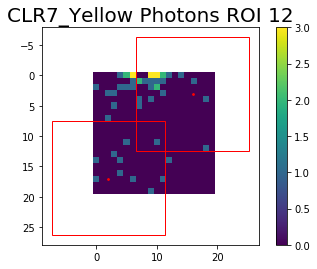

info message from bfgs algorithm is -1 

CLR7_Yellow Photons ROI 13 attempt 0: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 13 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 13 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 13 attempt 3: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 13 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 13 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 13 attempt 6: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 13 attempt 7: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 13 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 13 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photo

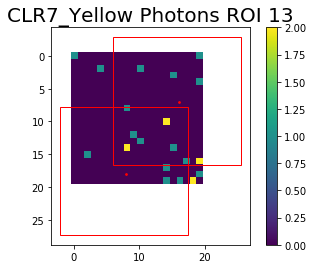

info message from bfgs algorithm is -1 

CLR7_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 14 attempt 1: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 14 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 14 attempt 3: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 14 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 14 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 14 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 14 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 14 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 14 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 14 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 14 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons

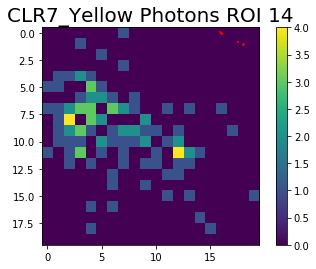

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 15 attempt 3: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 15 attempt 5: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 15 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 15 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 15 attempt 8: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 15 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 15 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 15 attempt 11: c routine returned info -1, trying again
CLR7_Yellow Photon

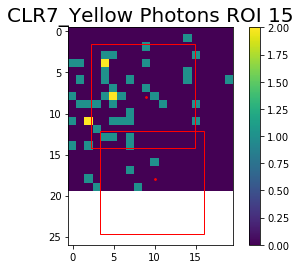

info message from bfgs algorithm is -1 

CLR7_Yellow Photons ROI 16 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 16 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 16 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 16 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 16 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 16 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 16 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 16 attempt 9: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 16 attempt 10: c routine returned info 2, trying again
CLR7_Yellow Photons ROI 16 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons 

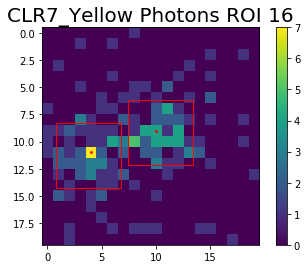

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 17 attempt 0: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 17 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 17 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 17 attempt 3: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 17 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 17:value of Istar is 0.50 and Istarthreshold is 0.91, success!


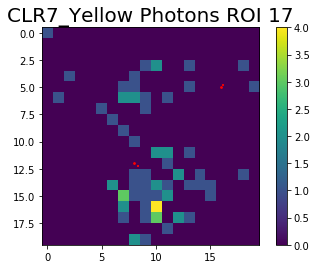

info message from bfgs algorithm is 4 

ROI 18 touches image border, skipping 

CLR7_Yellow Photons ROI 19 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 19 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 19 attempt 2: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 19 attempt 3: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 19:value of Istar is 0.85 and Istarthreshold is 1.06, success!


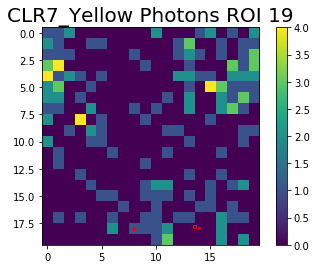

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 20 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 8: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 20 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 20 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons R

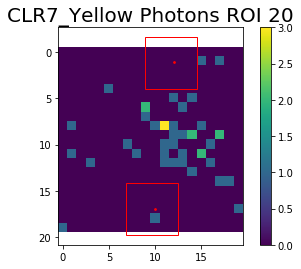

info message from bfgs algorithm is -1 

CLR7_Yellow Photons ROI 21 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 21 attempt 1: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 21 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 21 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 21 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 21 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 21 attempt 6: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 21 attempt 7: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 21 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 21 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 21 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 21 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photon

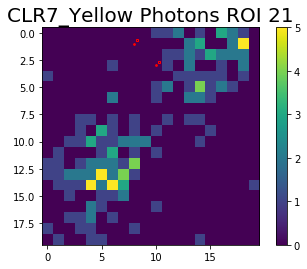

info message from bfgs algorithm is 4 

ROI 22 touches image border, skipping 

CLR7_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 23 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 23 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 23 attempt 3: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 23 attempt 5: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 23 attempt 6: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 23 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 23 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 23 attempt 9: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 23 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 23 attempt 11: c routine returned

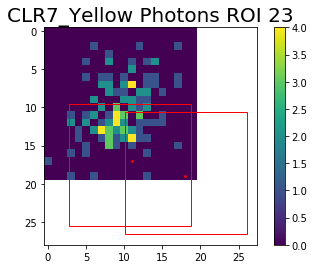

info message from bfgs algorithm is -1 

CLR7_Yellow Photons ROI 24 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 24 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons R

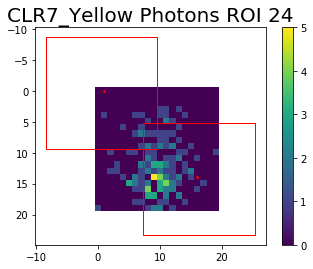

info message from bfgs algorithm is -1 

CLR7_Yellow Photons ROI 25 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 25 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 25 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 25 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 25 attempt 4: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 25 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 25:value of Istar is 0.65 and Istarthreshold is 0.96, success!


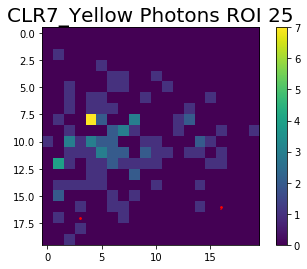

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 26 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 26 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 26 attempt 2: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 26 attempt 5: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 26 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 26 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 26 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 26 attempt 9: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 26 attempt 10: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 26 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photons

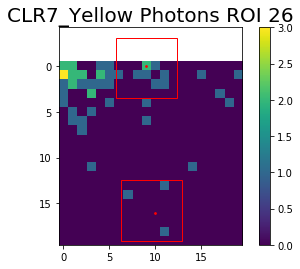

info message from bfgs algorithm is -1 

CLR7_Yellow Photons ROI 27 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 27 attempt 1: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 27 attempt 2: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 27 attempt 3: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 27 attempt 4: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 27 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 27 attempt 7: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 27 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 27 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 27 attempt 10: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 27 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photo

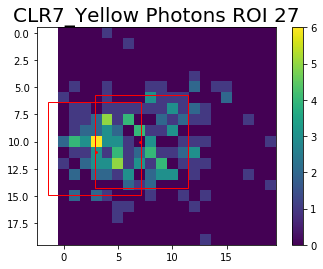

info message from bfgs algorithm is -1 

ROI 28 touches image border, skipping 

CLR7_Yellow Photons ROI 29:value of Istar is 0.62 and Istarthreshold is 1.00, success!


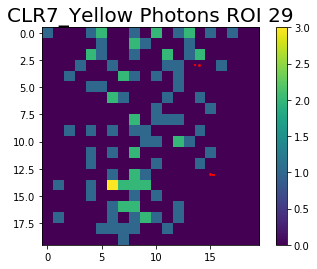

info message from bfgs algorithm is 4 

CLR7_Yellow Photons ROI 30 attempt 0: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 30 attempt 1: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 30 attempt 2: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 30 attempt 3: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 30 attempt 4: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 30 attempt 5: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 30 attempt 6: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 30 attempt 7: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 30 attempt 8: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 30 attempt 9: c routine returned info 1, trying again
CLR7_Yellow Photons ROI 30 attempt 10: c routine returned info -1, trying again
CLR7_Yellow Photons ROI 30 attempt 11: c routine returned info 1, trying again
CLR7_Yellow Photon

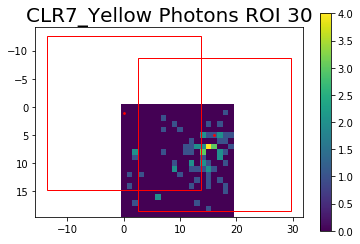

info message from bfgs algorithm is -1 

ROI 31 touches image border, skipping 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR8.txt'
number of records is 3334807
ROI 0 touches image border, skipping 

ROI 1 touches image border, skipping 

CLR8_Yellow Photons ROI 2 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 2 attempt 3: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 2 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 2 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 2 attempt 8: c routine re

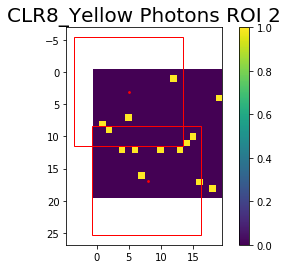

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 8: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 3 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 3 attemp

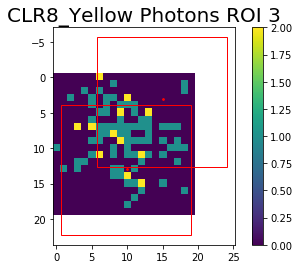

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 5: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 4 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 4 attemp

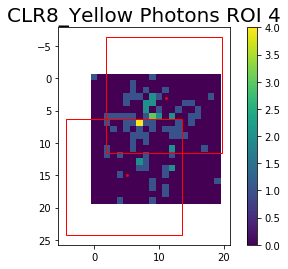

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 5 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 4: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 5 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 5 attemp

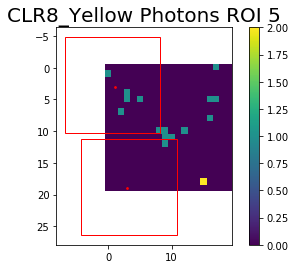

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 6 attempt

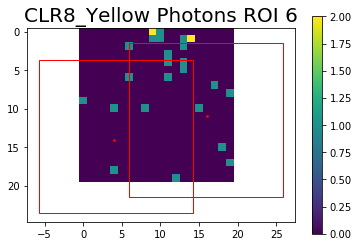

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 5: c routine returned info 2, trying again
CLR8_Yellow Photons ROI 7 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 7 attempt

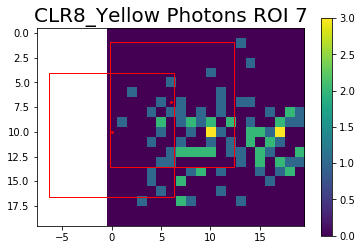

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 8 attempt 1: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 8:value of Istar is 0.52 and Istarthreshold is 1.02, success!


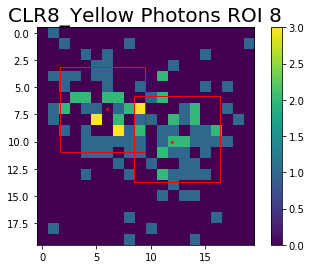

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attempt 4: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 9 attempt 5: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 9 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 9 attemp

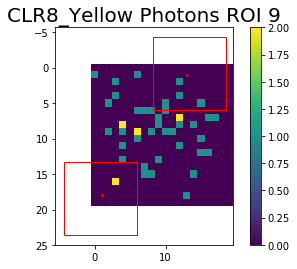

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 10 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons R

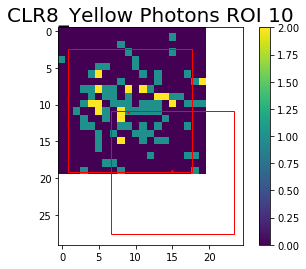

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 11 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 11 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons R

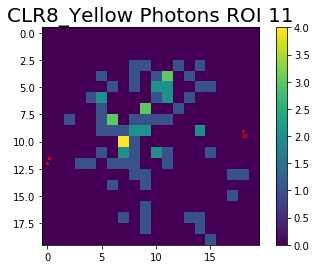

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 12 attempt 1: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 12 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 12 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 12 attempt 4: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 12 attempt 5: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 12 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 12 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 12 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 12 attempt 9: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 12 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 12 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photon

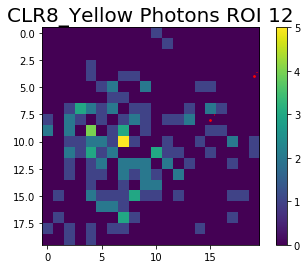

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 13 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 13 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 13 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 13 attempt 4: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 13 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 13 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 13 attempt 10: c routine returned info 2, trying again
CLR8_Yellow Photons ROI 13 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons R

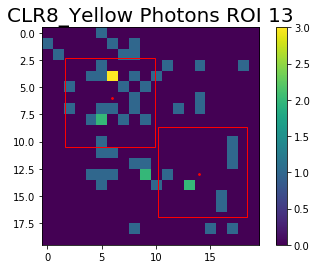

info message from bfgs algorithm is -1 

ROI 14 touches image border, skipping 

CLR8_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 15 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 15 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 15 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 15 attempt 7: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 15 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 15:value of Istar is 0.90 and Istarthreshold is 1.04, success!


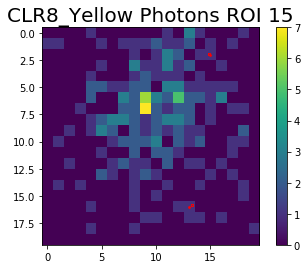

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 16 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 16 attempt 2: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 16 attempt 3: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 16 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 16 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 16 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 16 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 16 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 16 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 16 attempt 10: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 16 attempt 11: c routine returned info -1, trying again
CLR8_Yellow Photon

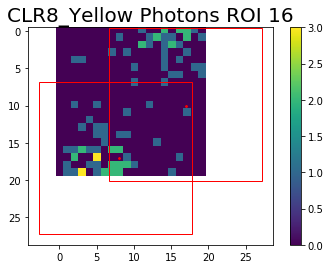

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 17 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 17:value of Istar is 0.68 and Istarthreshold is 1.01, success!


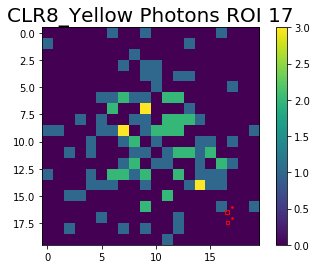

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 4: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 18 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons R

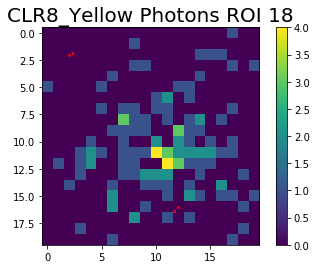

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 19 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 6: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 19 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 19 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons R

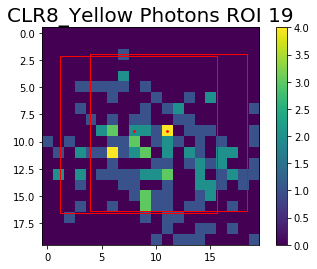

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 20 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 20 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 20 attempt 2: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 20 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 20 attempt 4: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 20 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 20 attempt 6: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 20 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 20 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 20 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 20 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 20 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photon

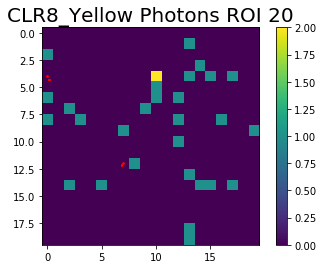

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 21 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 4: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 21 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 21 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons R

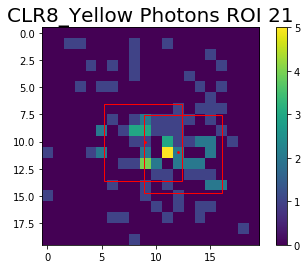

info message from bfgs algorithm is 4 

ROI 22 touches image border, skipping 

CLR8_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 23 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 23 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 23 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 23 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 23 attempt 6: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 23 attempt 7: c routine returned info 2, trying again
CLR8_Yellow Photons ROI 23 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 23 attempt 9: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 23 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 23 attempt 11: c routine returned i

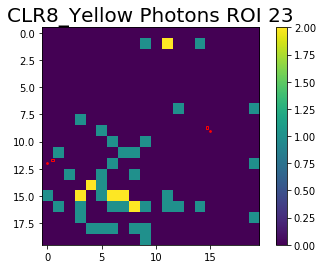

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 24 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 24 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 24 attempt 2: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 24 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 24 attempt 4: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 24 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 24 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 24 attempt 7: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 24 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 24 attempt 9: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 24 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 24 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photon

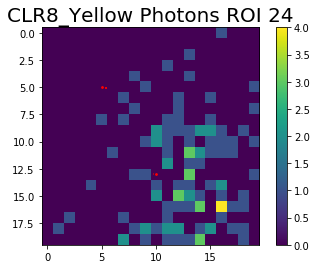

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 25:value of Istar is 0.69 and Istarthreshold is 1.06, success!


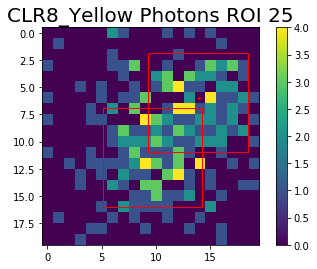

info message from bfgs algorithm is 4 

CLR8_Yellow Photons ROI 26 attempt 0: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 26 attempt 1: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 26 attempt 11: c routine returned info -1, trying again
CLR8_Yellow Photons 

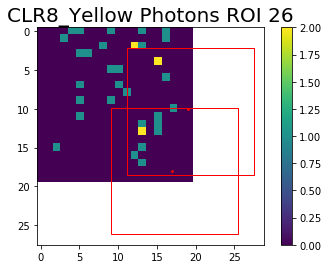

info message from bfgs algorithm is -1 

CLR8_Yellow Photons ROI 27 attempt 0: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 1: c routine returned info -1, trying again
CLR8_Yellow Photons ROI 27 attempt 2: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 3: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 4: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 6: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 7: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 8: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 9: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 10: c routine returned info 1, trying again
CLR8_Yellow Photons ROI 27 attempt 11: c routine returned info 1, trying again
CLR8_Yellow Photons 

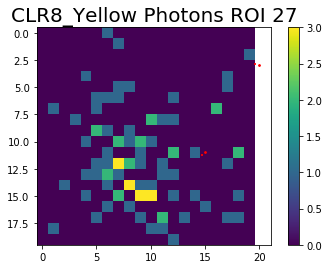

info message from bfgs algorithm is 4 

ROI 28 touches image border, skipping 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR9.txt'
number of records is 3495674
ROI 0 touches image border, skipping 

ROI 1 touches image border, skipping 

ROI 2 touches image border, skipping 

CLR9_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 3 attempt 1: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 3 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 3 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 3 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 3 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 3 attempt 7: c routine returned info -1, trying again
CLR9_Yello

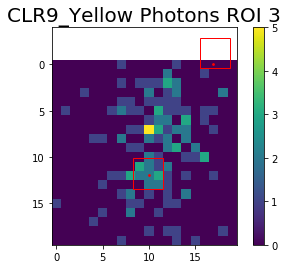

info message from bfgs algorithm is -1 

ROI 4 touches image border, skipping 

ROI 5 touches image border, skipping 

CLR9_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 6 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 6 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 6 attempt 3: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 6 attempt 4: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 6 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 6 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 6 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 6 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 6:value of Istar is 0.73 and Istarthreshold is 0.97, success!


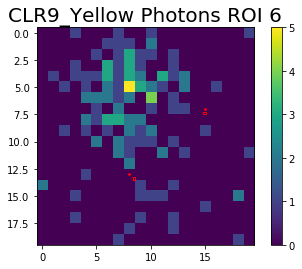

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 7 attempt 0: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 7 attempt 1: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 7 attempt 3: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 7 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 7 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 7 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 7 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 7 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 7 attempt 11: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 7 atte

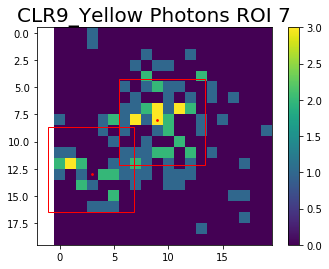

info message from bfgs algorithm is 4 

ROI 8 touches image border, skipping 

CLR9_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 9 attempt 1: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 9 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 9 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 9 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 9 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 9 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 9 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 9 attempt 10: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 9 attempt 11: c routine returned info 1, trying

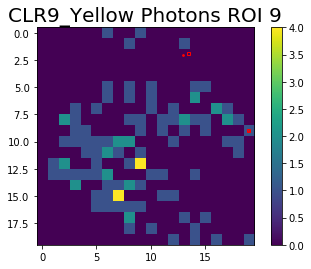

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 10 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 10 attempt 5: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 10 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 10 attempt 8: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 10 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 10 attempt 11: c routine returned info -1, trying again
CLR9_Yellow Photons

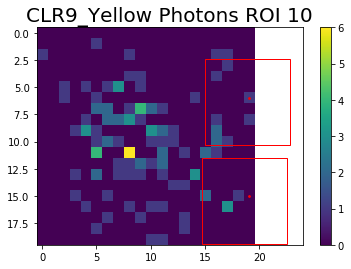

info message from bfgs algorithm is -1 

CLR9_Yellow Photons ROI 11 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 9: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 11 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 11 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons 

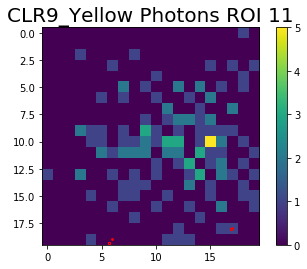

info message from bfgs algorithm is -1 

ROI 12 touches image border, skipping 

CLR9_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 13 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 13 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 13 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 13 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 13 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 13 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 13 attempt 8: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 13 attempt 10: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 13 attempt 11: c routine returned 

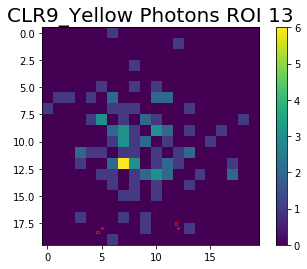

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 14 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 14 attempt 2: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 14 attempt 3: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 14 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 14 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 14 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 14 attempt 7: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 14 attempt 8: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 14 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 14 attempt 10: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 14 attempt 11: c routine returned info -1, trying again
CLR9_Yellow Phot

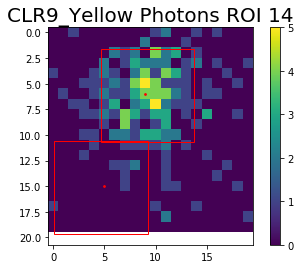

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 15 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons RO

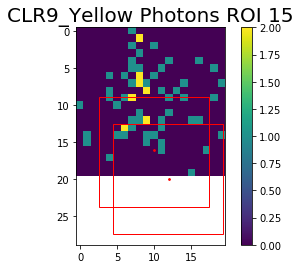

info message from bfgs algorithm is -1 

CLR9_Yellow Photons ROI 16 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 2: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 16 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons 

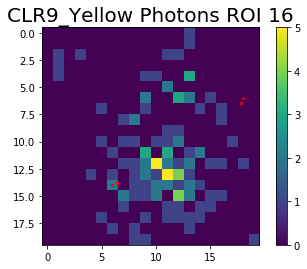

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 17 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 17 attempt 1: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 17 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 17 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 17:value of Istar is 0.46 and Istarthreshold is 0.99, success!


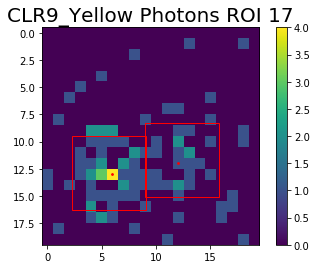

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 18 attempt 0: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 18 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons R

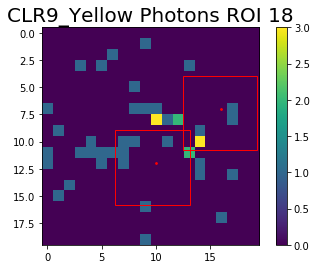

info message from bfgs algorithm is -1 

CLR9_Yellow Photons ROI 19 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 19 attempt 11: c routine returned info -1, trying again
CLR9_Yellow Photons 

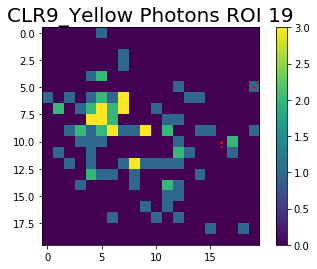

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 20 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 20 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons RO

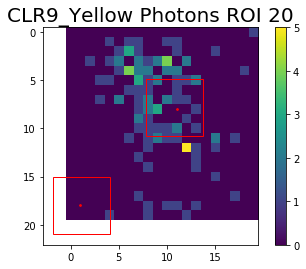

info message from bfgs algorithm is -1 

CLR9_Yellow Photons ROI 21 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 21 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 21 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 21 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 21 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 21 attempt 5: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 21 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 21 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 21 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 21 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 21:value of Istar is 0.45 and Istarthreshold is 0.91, success!


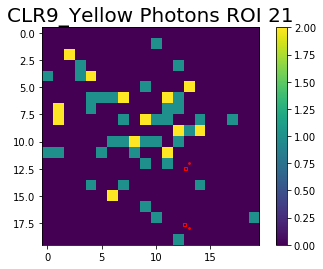

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 22 attempt 0: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 22 attempt 1: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 22 attempt 2: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 22 attempt 3: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 22 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 22 attempt 5: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 22 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 22 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 22 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 22 attempt 9: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 22 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 22:value of Istar is 0.79 and Istarthreshold is 0.96, success!


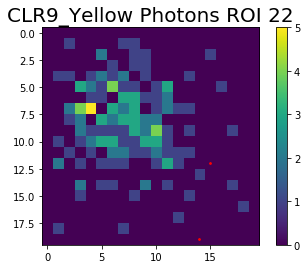

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 23 attempt 1: c routine returned info 2, trying again
CLR9_Yellow Photons ROI 23 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 23 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 23 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 23 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 23 attempt 7: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 23 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 23 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 23 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 23 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons R

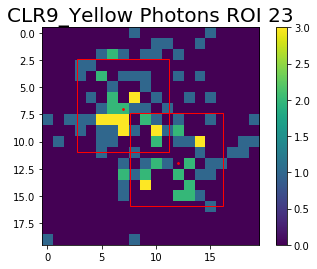

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 24 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 24 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 24 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 24 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 24 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 24 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 24 attempt 6: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 24 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 24 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 24 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 24:value of Istar is 0.61 and Istarthreshold is 0.98, success!


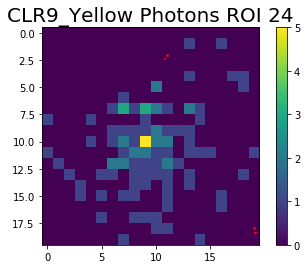

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 25 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 25:value of Istar is 0.58 and Istarthreshold is 0.99, success!


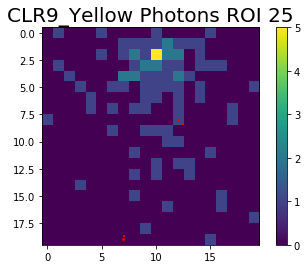

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 26 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 26 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons RO

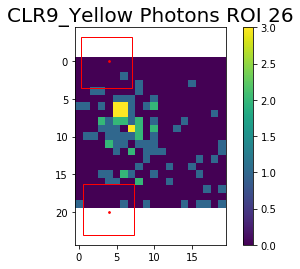

info message from bfgs algorithm is -1 

CLR9_Yellow Photons ROI 27 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 27:value of Istar is 0.61 and Istarthreshold is 0.95, success!


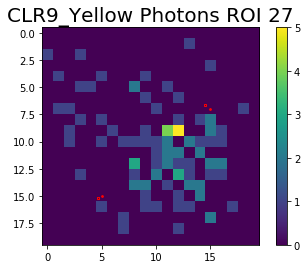

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 28 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 28 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons RO

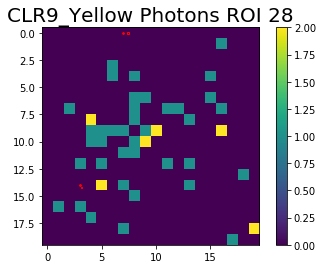

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 29 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 29 attempt 1: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 29 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 29 attempt 3: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 29 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 29 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 29 attempt 6: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 29:value of Istar is 0.46 and Istarthreshold is 0.97, success!


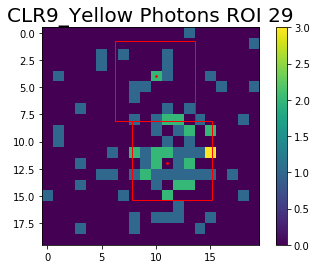

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 30 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 30 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 30 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 30 attempt 3: c routine returned info 2, trying again
CLR9_Yellow Photons ROI 30 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 30 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 30 attempt 6: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 30 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 30 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 30 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 30 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 30 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons R

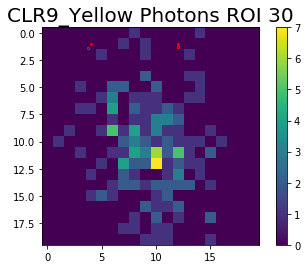

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 31 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 31 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons RO

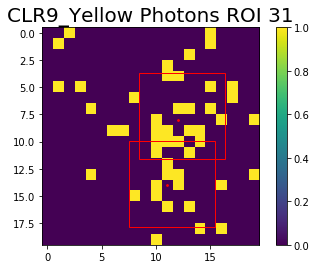

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 32 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 1: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 32 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 32 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons R

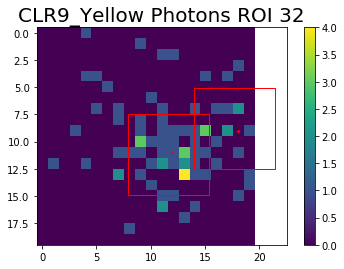

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 33 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 33 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons RO

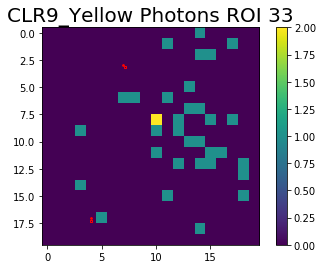

info message from bfgs algorithm is -1 

CLR9_Yellow Photons ROI 34 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 34 attempt 1: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 34 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 34 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 34 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 34 attempt 5: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 34 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 34 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 34 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 34 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 34 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 34 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons

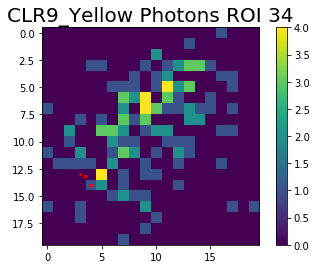

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 35 attempt 0: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 35 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 35 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons R

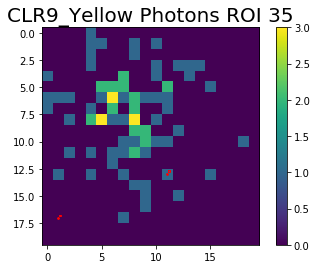

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 36 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 36 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 36 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 36 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 36 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 36 attempt 5: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 36 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 36 attempt 7: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 36 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 36 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 36 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 36 attempt 11: c routine returned info -1, trying again
CLR9_Yellow Photons

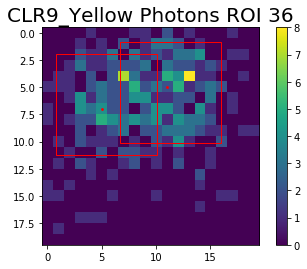

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 37 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 37 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 37 attempt 2: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 37 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 37 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 37 attempt 5: c routine returned info 2, trying again
CLR9_Yellow Photons ROI 37 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 37 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 37 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 37 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 37 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 37 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons R

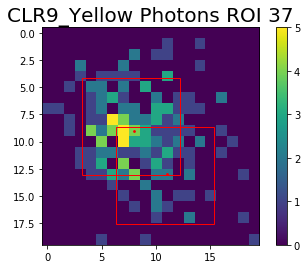

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 38 attempt 0: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 38 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 38 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 38 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 38 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 38 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 38 attempt 6: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 38 attempt 7: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 38 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 38 attempt 9: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 38 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 38 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photon

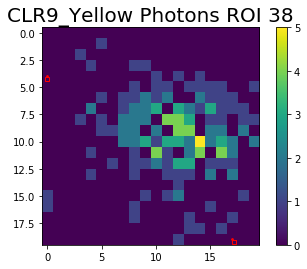

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 39 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 39 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 39 attempt 2: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 39 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 39 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 39 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 39 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 39 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 39 attempt 8: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 39 attempt 9: c routine returned info 2, trying again
CLR9_Yellow Photons ROI 39 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 39 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons R

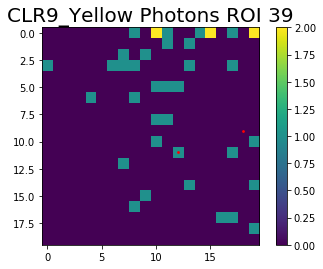

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 40 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 40 attempt 1: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 40 attempt 2: c routine returned info 2, trying again
CLR9_Yellow Photons ROI 40 attempt 3: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 40 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 40 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 40 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 40 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 40 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 40 attempt 9: c routine returned info 2, trying again
CLR9_Yellow Photons ROI 40 attempt 10: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 40 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons 

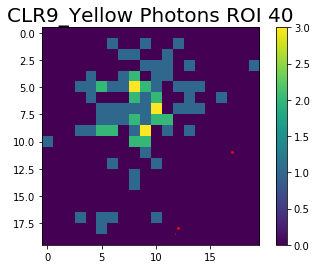

info message from bfgs algorithm is 4 

CLR9_Yellow Photons ROI 41 attempt 0: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 41 attempt 1: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 41 attempt 2: c routine returned info -1, trying again
CLR9_Yellow Photons ROI 41 attempt 3: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 41 attempt 4: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 41 attempt 5: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 41 attempt 6: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 41 attempt 7: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 41 attempt 8: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 41 attempt 9: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 41 attempt 10: c routine returned info 1, trying again
CLR9_Yellow Photons ROI 41 attempt 11: c routine returned info 1, trying again
CLR9_Yellow Photons 

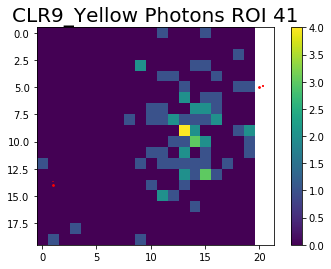

info message from bfgs algorithm is 4 

ROI 42 touches image border, skipping 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR10.txt'
number of records is 3522315
ROI 0 touches image border, skipping 

CLR10_Yellow Photons ROI 1 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 1 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 1 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 1 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 1 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 1 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 1:value of Istar is 0.43 and Istarthreshold is 0.91, success!


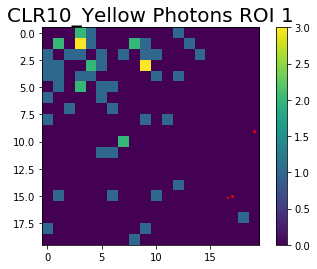

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 2 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2 attempt 7: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 2 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 2:value of Istar is 0.52 and Istarthreshold is 0.98, success!


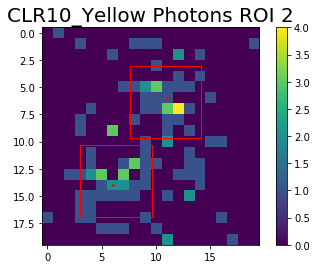

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 3: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 3 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 3 attempt 11: c routine returned info 1, trying again
CLR10_Yellow Photons 

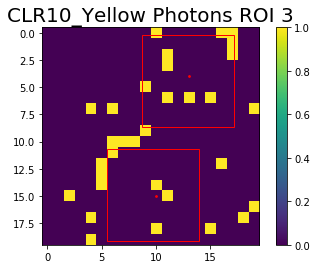

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 4 attempt 1: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 4 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 4:value of Istar is 0.70 and Istarthreshold is 1.02, success!


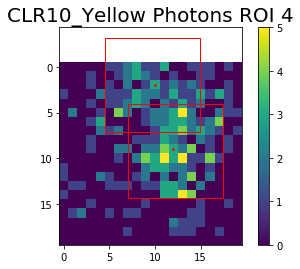

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 5 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 5 attempt 11: c routine returned info 1, trying again
CLR10_Yellow Photons R

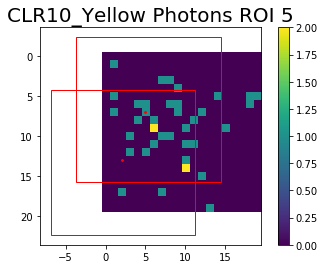

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 6:value of Istar is 0.87 and Istarthreshold is 1.04, success!


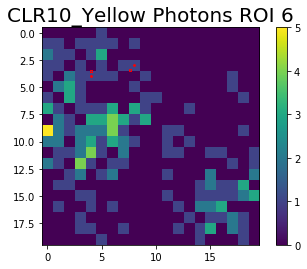

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 7 attempt 11: c routine returned info 1, trying again
CLR10_Yellow Photons R

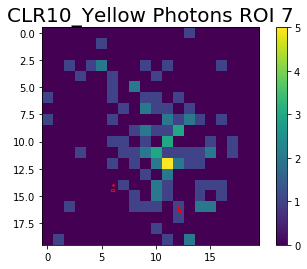

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 8 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 8:value of Istar is 0.47 and Istarthreshold is 0.97, success!


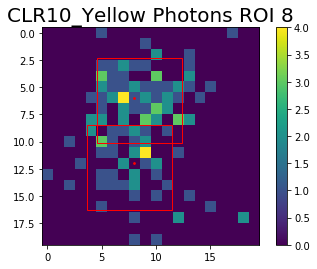

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 9 attempt 0: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 9 attempt 1: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 9 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 9 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 9 attempt 5: c routine returned info 2, trying again
CLR10_Yellow Photons ROI 9 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 9 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 9 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 9 attempt 10: c routine returned info 2, trying again
CLR10_Yellow Photons ROI 9 attempt 11: c routine returned info -1, trying again
CLR10_Yellow Photon

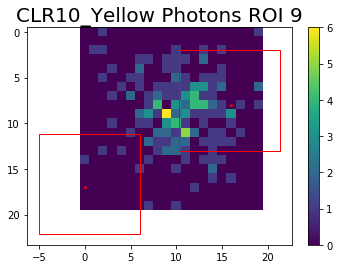

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 10 attempt 2: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 10 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 10 attempt 8: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 10 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 10 attempt 11: c routine returned info 1, trying again
CLR10_Y

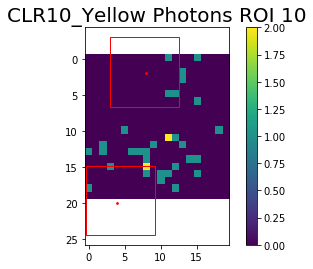

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 11 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 7: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 11 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 11 attempt 11: c routine returned info 1, trying again
CLR10_Ye

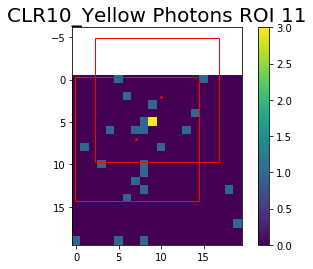

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 12 attempt 11: c routine returned info 1, trying again
CLR10_Yel

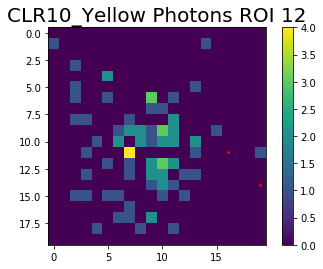

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 13 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 13 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 13 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 13 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 13 attempt 5: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 13 attempt 6: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 13 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 13 attempt 11: c routine returned info 1, trying again
CLR10_Ye

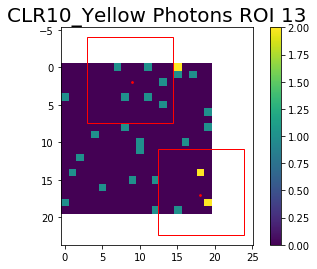

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 14 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 14 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 14 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 14 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 14 attempt 5: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 14 attempt 6: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 14 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 14 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 14 attempt 9: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 14 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 14 attempt 11: c routine returned info 1, trying again
CLR10_

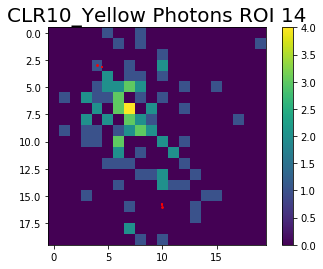

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 15 attempt 3: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 15:value of Istar is 0.71 and Istarthreshold is 0.94, success!


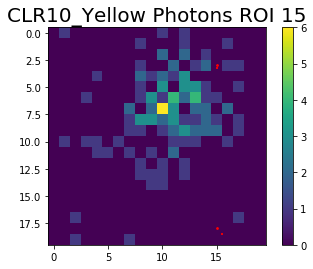

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 16 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 16 attempt 1: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 16 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 16 attempt 4: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 16 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 16 attempt 6: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 16 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 16 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 16 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 16 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 16 attempt 11: c routine returned info 1, trying again
CLR10_Y

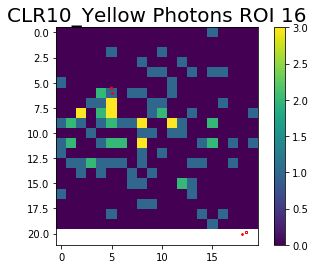

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 17 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 17 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 17 attempt 2: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 17 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 17 attempt 4: c routine returned info 2, trying again
CLR10_Yellow Photons ROI 17:value of Istar is 0.54 and Istarthreshold is 1.00, success!


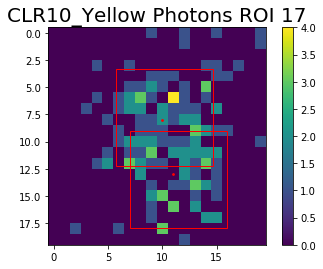

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 18 attempt 11: c routine returned info 1, trying again
CLR10_Yell

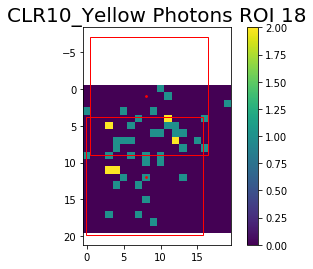

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 19 attempt 0: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 19 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 19 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 19 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 19 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 19 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 19 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 19 attempt 7: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 19 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 19 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 19 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 19 attempt 11: c routine returned info 1, trying again
CLR10_Y

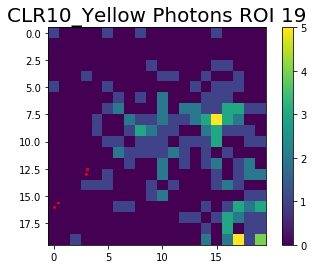

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 20 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 20:value of Istar is 0.89 and Istarthreshold is 1.00, success!


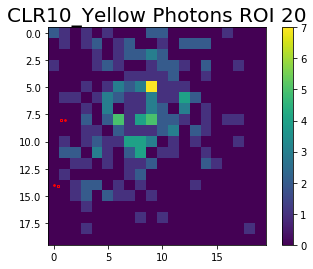

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 21 attempt 0: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 21 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 21 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 21 attempt 3: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 21 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 21 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 21 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 21 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 21 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 21 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 21 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 21 attempt 11: c routine returned info 1, trying again
CLR10_Ye

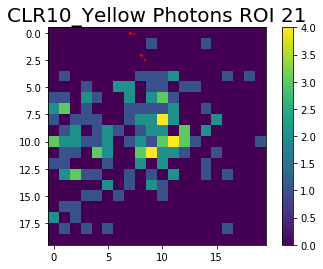

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 22 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 22 attempt 11: c routine returned info 1, trying again
CLR10_Yell

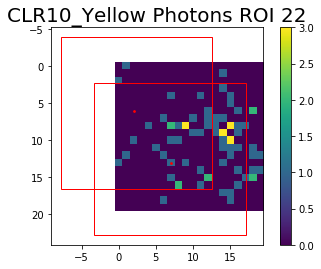

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 23 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 23 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 23 attempt 3: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 23 attempt 5: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 23 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 23 attempt 7: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 23 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 23 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 23 attempt 10: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 23 attempt 11: c routine returned info 1, trying again
CLR10

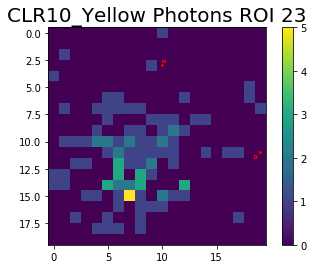

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 24 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 4: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 24 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 24 attempt 11: c routine returned info 1, trying again
CLR10_Yel

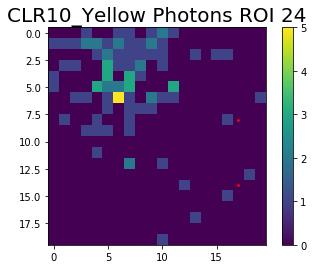

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 25 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 25 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 25 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 25 attempt 3: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 25 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 25 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 25 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 25 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 25 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 25 attempt 9: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 25 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 25 attempt 11: c routine returned info 1, trying again
CLR10_Ye

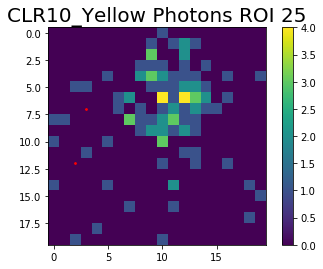

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 26 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 26 attempt 1: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 26 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 26 attempt 3: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 26 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 26 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 26:value of Istar is 0.47 and Istarthreshold is 0.98, success!


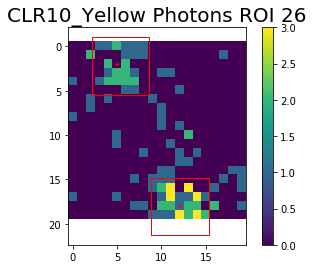

info message from bfgs algorithm is 4 

CLR10_Yellow Photons ROI 27 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 2: c routine returned info -1, trying again
CLR10_Yellow Photons ROI 27 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 27 attempt 11: c routine returned info 1, trying again
CLR10_Yel

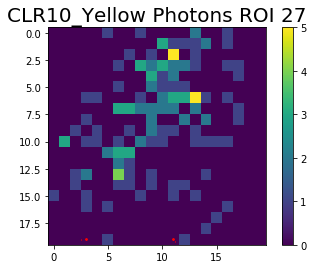

info message from bfgs algorithm is -1 

CLR10_Yellow Photons ROI 28 attempt 0: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 1: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 2: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 3: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 4: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 5: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 6: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 7: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 8: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 9: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 10: c routine returned info 1, trying again
CLR10_Yellow Photons ROI 28 attempt 11: c routine returned info 1, trying again
CLR10_Yel

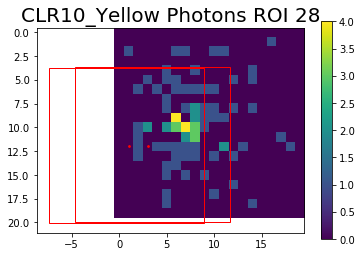

info message from bfgs algorithm is -1 

ROI 29 touches image border, skipping 

ROI 30 touches image border, skipping 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR11.txt'
number of records is 3370637
CLR11_Yellow Photons ROI 0 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 0 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 0 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 0 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 0 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 0 attempt 5: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 0 attempt 6: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 0 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 0 attempt 8: c routine returned info 1, trying again

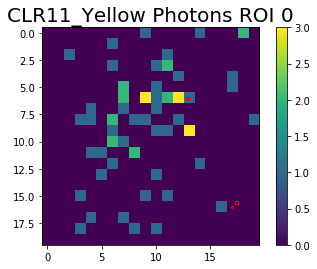

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 1 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 2: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 1 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 1 attempt 11: c routine returned info 1, trying again
CLR11_Yellow Photons 

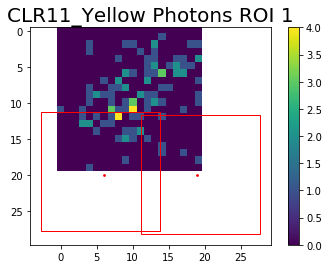

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 2 attempt 0: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 2 attempt 1: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 2 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 2 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 2 attempt 7: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 2 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 2 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 2 attempt 10: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 2 attempt 11: c routine returned info 1, trying again
CLR11_Yellow Phot

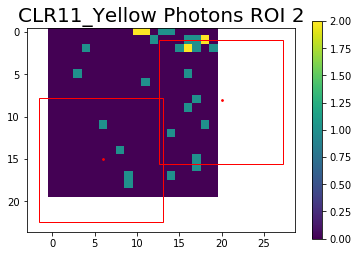

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 3 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 3 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 3 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 3 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 3 attempt 4: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 3 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 3 attempt 6: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 3 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 3 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 3 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 3 attempt 10: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 3 attempt 11: c routine returned info 1, trying again
CLR11_Yellow Photo

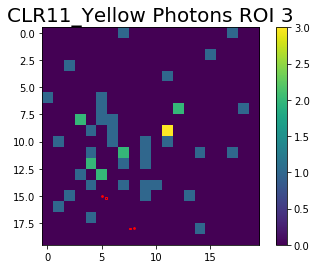

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 4 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 4 attempt 11: c routine returned info 1, trying again
CLR11_Yellow Photons R

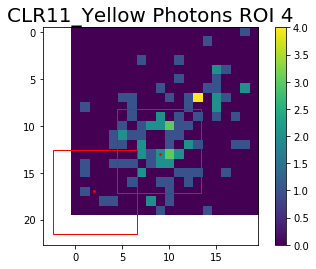

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 5 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 5 attempt 4: c routine returned info 2, trying again
CLR11_Yellow Photons ROI 5 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 5 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 5 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 5 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 5:value of Istar is 0.63 and Istarthreshold is 1.02, success!


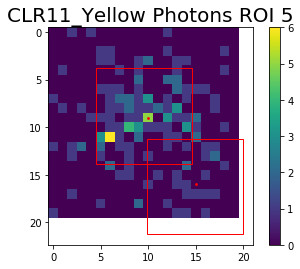

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 6 attempt 0: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 6 attempt 1: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 6 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 6 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 6 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 6 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 6 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 6 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 6 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 6 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 6 attempt 10: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 6 attempt 11: c routine returned info 1, trying again
CLR11_Yellow Photon

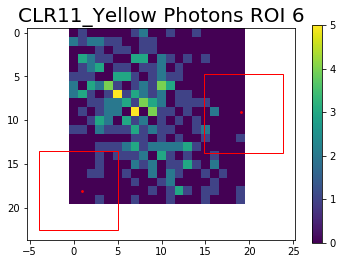

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 7 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 7 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 7 attempt 5: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 7 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 7 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 7 attempt 9: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 7 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 7 attempt 11: c routine returned info 1, trying again
CLR11_Yellow Photon

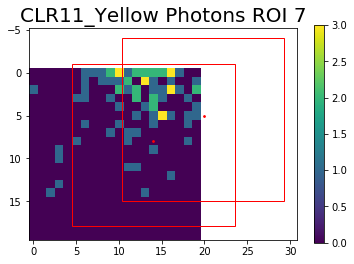

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 8 attempt 1: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 8 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 8 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 8 attempt 5: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 8 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 8 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 8 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 8 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 8:value of Istar is 0.57 and Istarthreshold is 0.94, success!


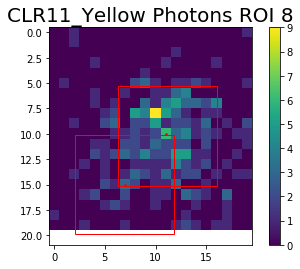

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 9 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 9 attempt 3: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 9 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 9 attempt 5: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 9 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 9 attempt 7: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 9 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 9 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 9 attempt 11: c routine returned info -1, trying again
CLR11_Yellow Photo

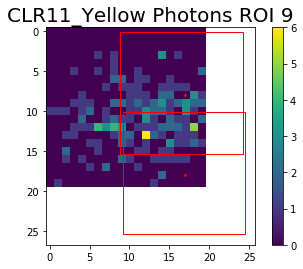

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 10 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 10 attempt 3: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 10 attempt 7: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 10 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 10 attempt 10: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 10 attempt 11: c routine returned info 1, trying again
CLR11_

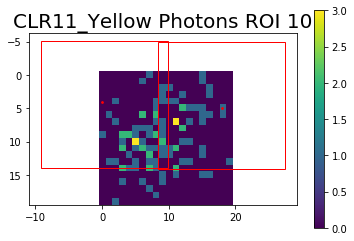

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 11 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 11:value of Istar is 0.64 and Istarthreshold is 0.95, success!


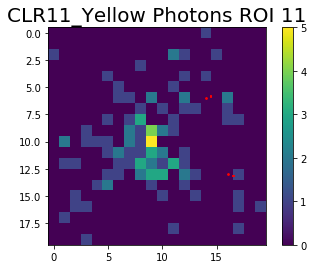

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 12 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 12 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 12 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 12 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 12 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 12 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 12 attempt 7: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 12 attempt 8: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 12 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 12 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 12 attempt 11: c routine returned info 1, trying again
CLR11_Ye

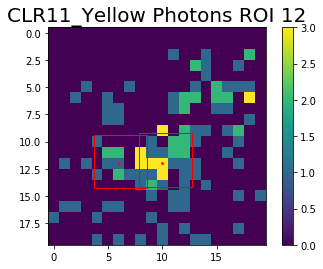

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 9: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 13 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 13 attempt 11: c routine returned info 1, trying again
CLR11_Yel

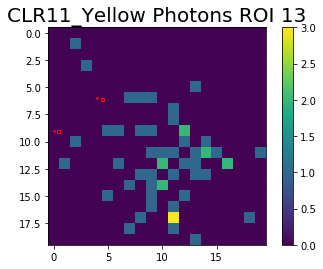

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 14 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 14 attempt 2: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 14 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 14 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 14 attempt 5: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 14 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 14 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 14 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 14 attempt 9: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 14 attempt 10: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 14 attempt 11: c routine returned info 1, trying again
CLR11_

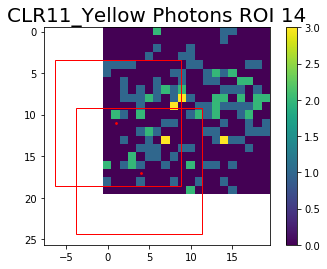

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 15 attempt 0: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 15 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 15 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 15 attempt 6: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 15 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 15 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 15 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 15 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 15 attempt 11: c routine returned info 1, trying again
CLR11_Y

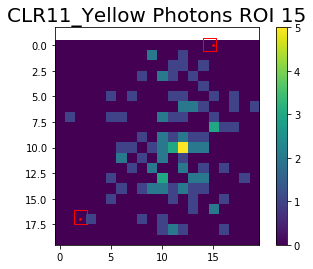

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 16 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 16 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 16 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 16 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 16 attempt 6: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 16 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 16 attempt 8: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 16 attempt 9: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 16 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 16 attempt 11: c routine returned info 1, trying again
CLR11_

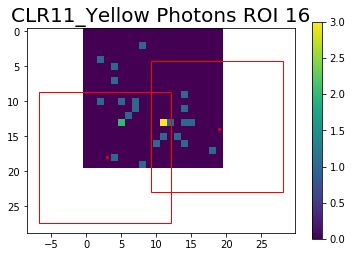

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 17 attempt 0: c routine returned info 2, trying again
CLR11_Yellow Photons ROI 17 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 17 attempt 2: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 17 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 17 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 17 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 17 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 17 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 17 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 17 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 17 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 17 attempt 11: c routine returned info 1, trying again
CLR11_Ye

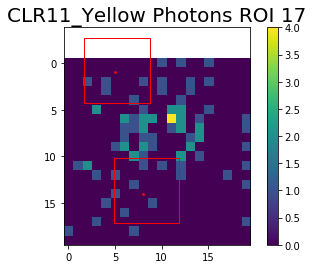

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 18 attempt 2: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 18 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 18 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 18 attempt 7: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 18 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 18 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 18 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 18 attempt 11: c routine returned info 1, trying again
CLR11_Y

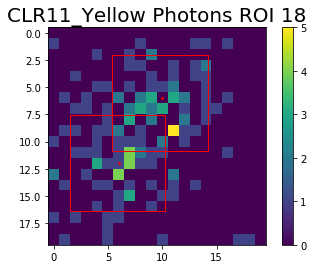

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 19 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 19 attempt 11: c routine returned info 1, trying again
CLR11_Yell

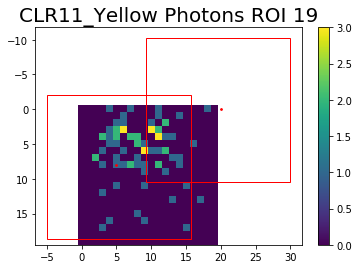

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 20 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 20 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 20 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 20 attempt 3: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 20 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 20 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 20 attempt 6: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 20 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 20 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 20 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 20 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 20 attempt 11: c routine returned info 1, trying again
CLR11_Y

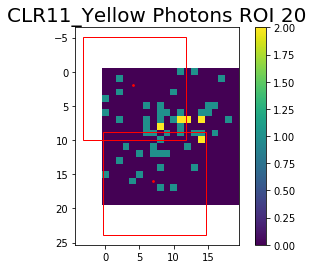

info message from bfgs algorithm is -1 

ROI 21 touches image border, skipping 

CLR11_Yellow Photons ROI 22 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 6: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 22 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 22 attempt 11: c routin

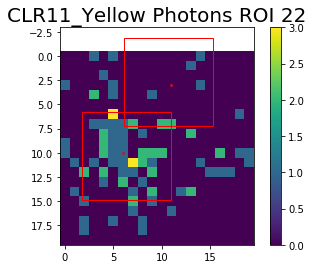

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 7: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 23 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 23 attempt 11: c routine returned info 1, trying again
CLR11_Yel

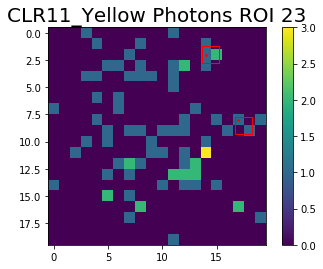

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 24 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 24 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 24 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 24 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 24 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 24 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 24 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 24:value of Istar is 0.48 and Istarthreshold is 1.00, success!


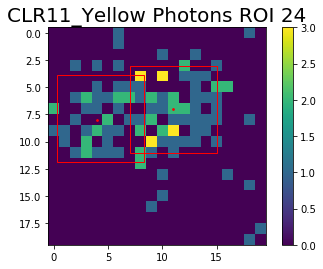

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 25 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 25:value of Istar is 0.46 and Istarthreshold is 0.97, success!


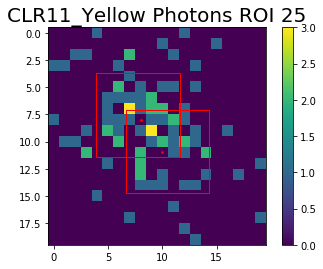

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 26 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 6: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 26 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 26 attempt 11: c routine returned info 1, trying again
CLR11_Yel

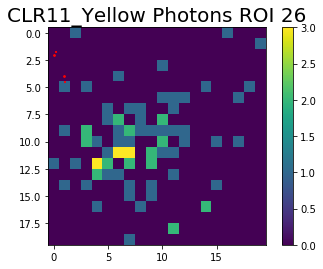

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 27 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 27 attempt 1: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 27 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 27 attempt 3: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 27 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 27 attempt 6: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 27 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 27 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 27 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 27 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 27 attempt 11: c routine returned info -1, trying again
CLR11_

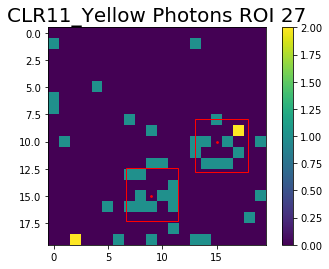

info message from bfgs algorithm is 4 

ROI 28 touches image border, skipping 

CLR11_Yellow Photons ROI 29 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 29 attempt 1: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 29 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 29 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 29:value of Istar is 0.56 and Istarthreshold is 0.96, success!


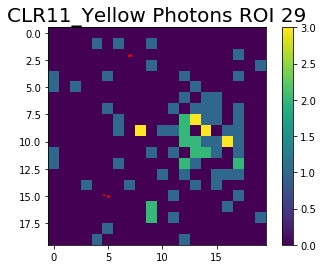

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 30 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 1: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 30 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 30 attempt 11: c routine returned info 1, trying again
CLR11_Yel

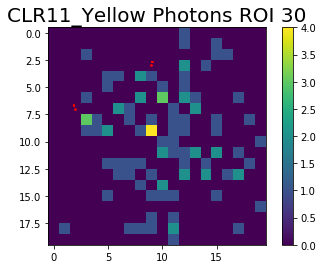

info message from bfgs algorithm is 4 

CLR11_Yellow Photons ROI 31 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 31 attempt 1: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 31 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 31 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 31 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 31 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 31 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 31 attempt 7: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 31 attempt 8: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 31 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 31 attempt 10: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 31 attempt 11: c routine returned info 1, trying again
CLR11_Y

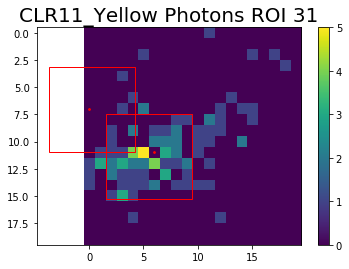

info message from bfgs algorithm is -1 

CLR11_Yellow Photons ROI 32 attempt 0: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 1: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 2: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 3: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 4: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 5: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 6: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 7: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 8: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 9: c routine returned info 1, trying again
CLR11_Yellow Photons ROI 32 attempt 10: c routine returned info -1, trying again
CLR11_Yellow Photons ROI 32 attempt 11: c routine returned info 1, trying again
CLR11_Ye

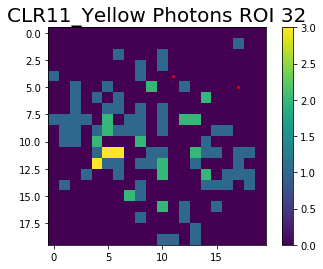

info message from bfgs algorithm is 4 

ROI 33 touches image border, skipping 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR18.txt'
number of records is 3738997
ROI 0 touches image border, skipping 

CLR18_Yellow Photons ROI 1 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 1:value of Istar is 0.72 and Istarthreshold is 0.95, success!


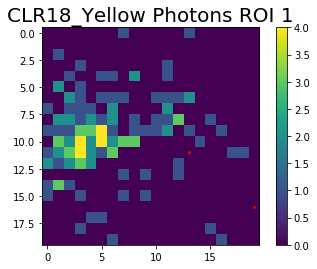

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 2 attempt 0: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 2:value of Istar is 0.58 and Istarthreshold is 1.01, success!


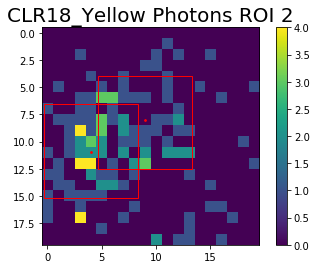

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 3:value of Istar is 0.60 and Istarthreshold is 0.94, success!


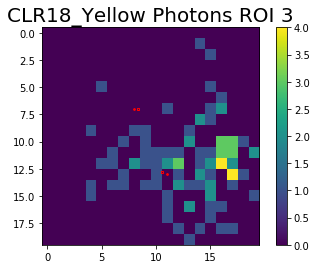

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 4:value of Istar is 0.82 and Istarthreshold is 1.03, success!


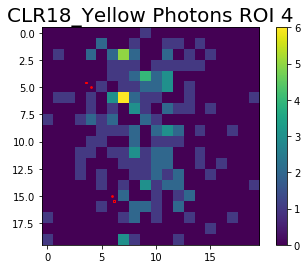

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 5 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 5 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 5 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 5 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 5 attempt 7: c routine returned info 2, trying again
CLR18_Yellow Photons ROI 5 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 5 attempt 9: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 5:value of Istar is 0.68 and Istarthreshold is 0.97, success!


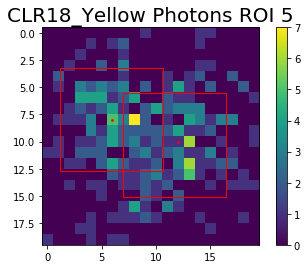

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 6 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 6 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 6 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 6 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 6:value of Istar is 0.64 and Istarthreshold is 1.00, success!


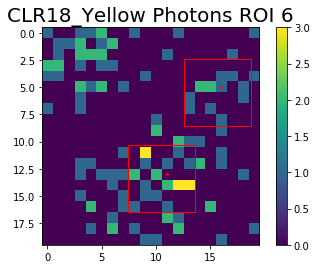

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 7 attempt 0: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 7 attempt 2: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 7 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 7 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 7 attempt 5: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 7 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 7 attempt 7: c routine returned info 2, trying again
CLR18_Yellow Photons ROI 7 attempt 8: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 7 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 7 attempt 11: c routine returned info 1, trying again
CLR18_Yellow Phot

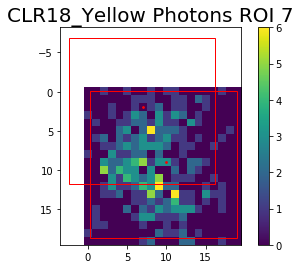

info message from bfgs algorithm is -1 

CLR18_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 8 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 8 attempt 11: c routine returned info -1, trying again
CLR18_Yellow Photon

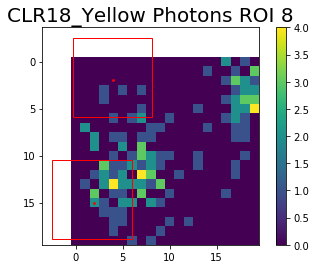

info message from bfgs algorithm is -1 

CLR18_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 9 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 9 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 9 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 9 attempt 5: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 9 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 9 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 9 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 9 attempt 10: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 9 attempt 11: c routine returned info 1, trying again
CLR18_Yellow Photo

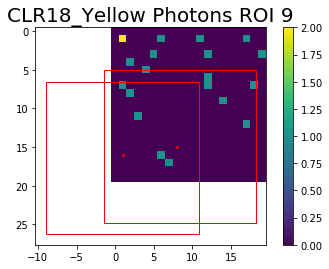

info message from bfgs algorithm is -1 

CLR18_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 10 attempt 2: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 10 attempt 3: value of Istar is 0.97 and Istarthreshold is 0.93, trying again
CLR18_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 10 attempt 5: value of Istar is 0.97 and Istarthreshold is 0.93, trying again
CLR18_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 10 attempt 7: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 10 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 10 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 10 attempt 11:

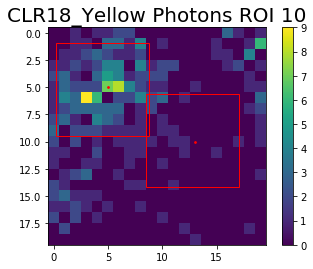

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 11 attempt 0: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 11 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 11 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 11 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 11 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 11 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 11 attempt 7: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 11 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 11 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 11 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 11 attempt 11: c routine returned info -1, trying again
CLR18_

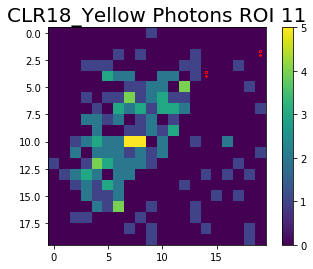

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 12 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 12 attempt 1: c routine returned info 2, trying again
CLR18_Yellow Photons ROI 12 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 12 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 12 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 12 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 12 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 12 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 12 attempt 8: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 12 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 12 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 12 attempt 11: c routine returned info 1, trying again
CLR18_Ye

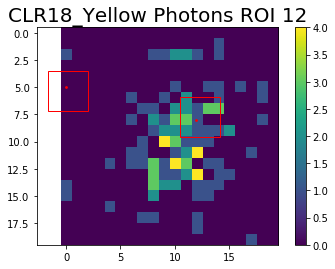

info message from bfgs algorithm is -1 

CLR18_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 13 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 13 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 13 attempt 3: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 13 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 13 attempt 5: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 13 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 13 attempt 10: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 13 attempt 11: c routine returned info 1, trying again
CLR18

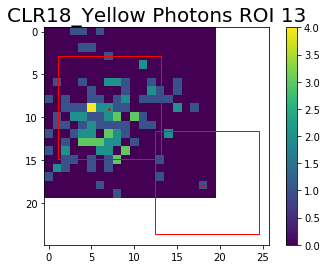

info message from bfgs algorithm is -1 

CLR18_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 14 attempt 1: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 14 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 14 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 14 attempt 4: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 14 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 14 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 14 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 14 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 14 attempt 9: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 14 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 14 attempt 11: c routine returned info -1, trying again
CLR18

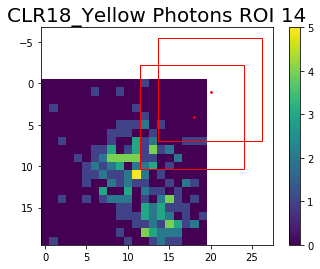

info message from bfgs algorithm is -1 

CLR18_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 4: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 15 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 15 attempt 11: c routine returned info 1, trying again
CLR18_Ye

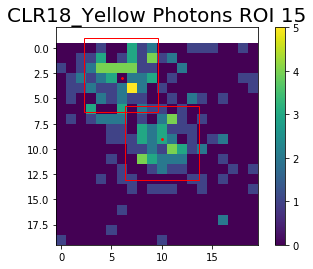

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 16 attempt 0: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 16 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 16 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 16 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 16 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 16 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 16 attempt 8: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 16 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 16 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 16 attempt 11: c routine returned info -1, trying again
CLR18_

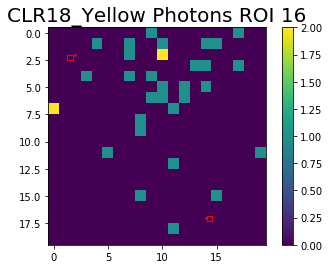

info message from bfgs algorithm is -1 

ROI 17 touches image border, skipping 

CLR18_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 18 attempt 2: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 18 attempt 3: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 18 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 18 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 18 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 18 attempt 8: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 18 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 18 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 18 attempt 11: c rout

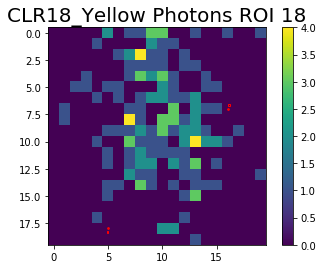

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 19 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 19 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 19 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 19 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 19 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 19 attempt 5: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 19 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 19 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 19 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 19 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 19 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 19 attempt 11: c routine returned info 1, trying again
CLR18_Ye

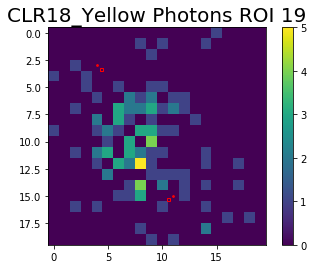

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 20 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 20 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 20 attempt 2: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 20 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 20 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 20 attempt 5: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 20 attempt 6: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 20 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 20 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 20 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 20 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 20 attempt 11: c routine returned info 1, trying again
CLR18_Y

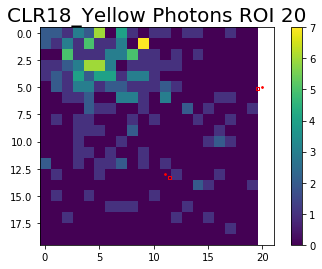

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 21 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 21 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 21 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 21 attempt 3: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 21 attempt 4: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 21 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 21 attempt 6: c routine returned info 2, trying again
CLR18_Yellow Photons ROI 21 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 21 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 21 attempt 9: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 21 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 21 attempt 11: c routine returned info 1, trying again
CLR18_Y

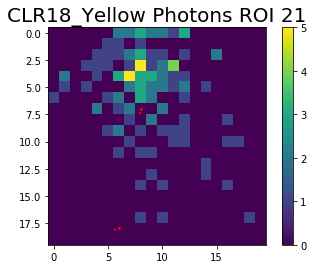

info message from bfgs algorithm is 4 

ROI 22 touches image border, skipping 

CLR18_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 23 attempt 1: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 23 attempt 2: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 23 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 23 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 23 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 23 attempt 7: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 23 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 23 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 23 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 23 attempt 11: c routi

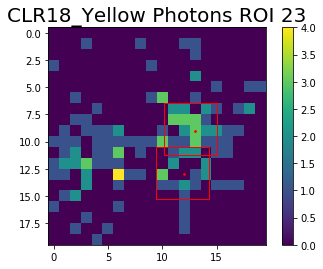

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 24 attempt 0: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 24 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 24 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 24 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 24 attempt 4: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 24 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 24 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 24 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 24 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 24 attempt 9: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 24 attempt 10: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 24 attempt 11: c routine returned info 1, trying again
CLR18_

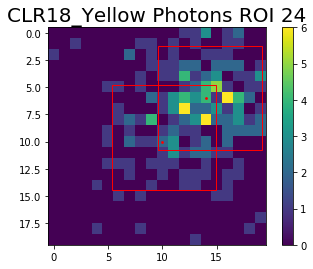

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 25 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 25 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 25 attempt 2: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 25 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 25 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 25 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 25 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 25 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 25 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 25 attempt 9: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 25 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 25 attempt 11: c routine returned info -1, trying again
CLR18_Y

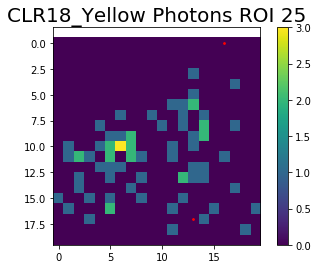

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 26 attempt 0: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 26 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 26 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 26 attempt 5: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 26 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 26 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 26 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 26 attempt 9: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 26 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 26 attempt 11: c routine returned info 1, trying again
CLR18_Y

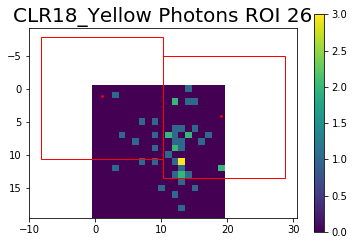

info message from bfgs algorithm is -1 

CLR18_Yellow Photons ROI 27 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 4: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 27 attempt 11: c routine returned info 1, trying again
CLR18_Ye

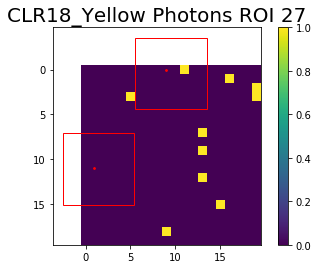

info message from bfgs algorithm is -1 

CLR18_Yellow Photons ROI 28 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 28 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 28 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 28 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 28 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 28 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 28 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 28 attempt 7: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 28 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 28 attempt 9: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 28 attempt 10: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 28 attempt 11: c routine returned info 1, trying again
CLR18_

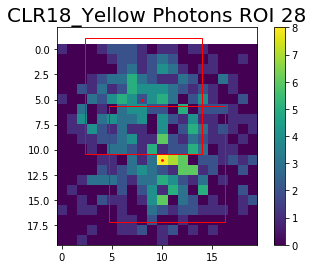

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 29 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 2: c routine returned info 2, trying again
CLR18_Yellow Photons ROI 29 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 29 attempt 11: c routine returned info 1, trying again
CLR18_Yell

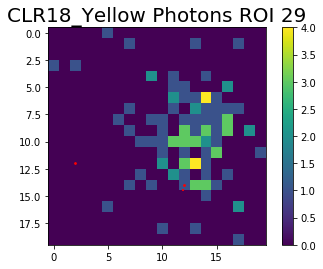

info message from bfgs algorithm is -1 

CLR18_Yellow Photons ROI 30 attempt 0: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 30:value of Istar is 0.57 and Istarthreshold is 0.96, success!


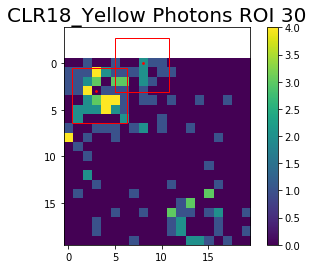

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 31 attempt 0: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 31 attempt 1: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 31 attempt 2: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 31 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 31 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 31 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 31 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 31 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 31 attempt 8: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 31 attempt 9: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 31 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 31 attempt 11: c routine returned info 1, trying again
CLR18

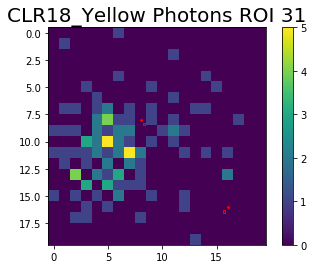

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 32 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 32 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 32 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 32 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 32 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 32 attempt 5: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 32 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 32 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 32 attempt 8: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 32 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 32 attempt 10: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 32 attempt 11: c routine returned info 1, trying again
CLR18_Ye

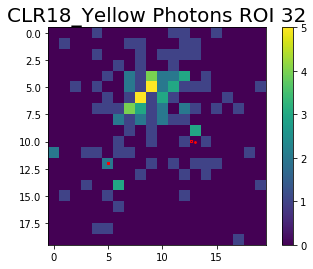

info message from bfgs algorithm is 4 

CLR18_Yellow Photons ROI 33 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 33 attempt 1: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 33 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 33 attempt 3: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 33 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 33 attempt 5: c routine returned info 2, trying again
CLR18_Yellow Photons ROI 33 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 33 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 33 attempt 8: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 33 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 33 attempt 10: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 33 attempt 11: c routine returned info 1, trying again
CLR18_Ye

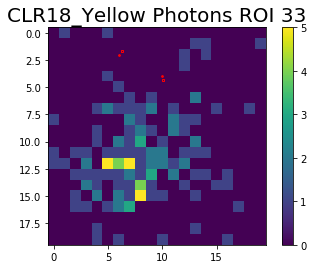

info message from bfgs algorithm is 4 

ROI 34 touches image border, skipping 

CLR18_Yellow Photons ROI 35 attempt 0: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 35 attempt 1: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 35 attempt 2: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 35 attempt 3: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 35 attempt 4: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 35 attempt 5: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 35 attempt 6: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 35 attempt 7: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 35 attempt 8: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 35 attempt 9: c routine returned info 1, trying again
CLR18_Yellow Photons ROI 35 attempt 10: c routine returned info -1, trying again
CLR18_Yellow Photons ROI 35 attempt 11: c routi

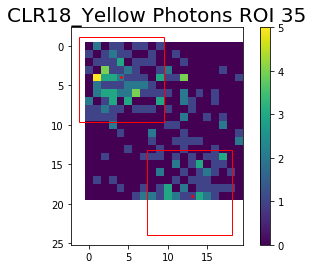

info message from bfgs algorithm is 4 

ROI 36 touches image border, skipping 

ROI 37 touches image border, skipping 

ROI 38 touches image border, skipping 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR19.txt'
number of records is 3736793
ROI 0 touches image border, skipping 

ROI 1 touches image border, skipping 

ROI 2 touches image border, skipping 

ROI 3 touches image border, skipping 

ROI 4 touches image border, skipping 

CLR19_Yellow Photons ROI 5 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 5 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 5 attempt 4: c routine returned info 2, trying again
CLR19_Yellow Photons ROI 5 attempt 5: c routine returned info -1, trying again


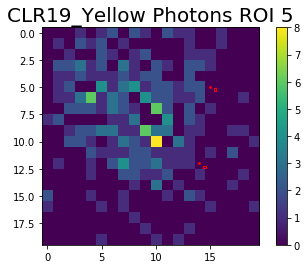

info message from bfgs algorithm is 4 

ROI 6 touches image border, skipping 

CLR19_Yellow Photons ROI 7 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 7 attempt 11: c routine returned info

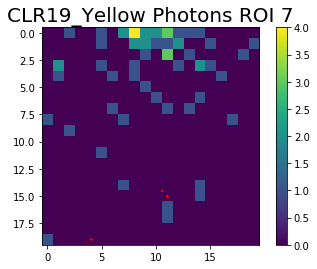

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 8 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 8 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 8 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 8 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 8 attempt 6: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 8 attempt 7: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 8 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 8 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 8 attempt 11: c routine returned info 1, trying again
CLR19_Yellow Photons

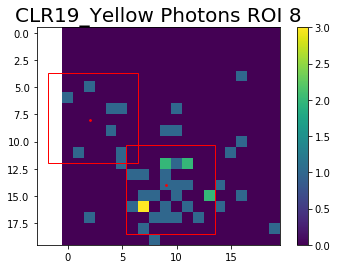

info message from bfgs algorithm is -1 

CLR19_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 9 attempt 1: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 9 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 9 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 9 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 9 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 9 attempt 6: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 9 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 9 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 9 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 9 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 9 attempt 11: c routine returned info -1, trying again
CLR19_Yellow Photo

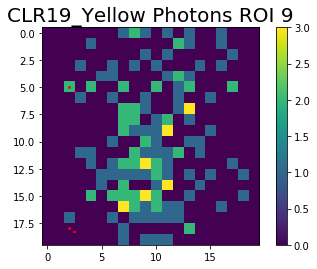

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 10 attempt 10: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 10 attempt 11: c routine returned info -1, trying again
CLR19_Ye

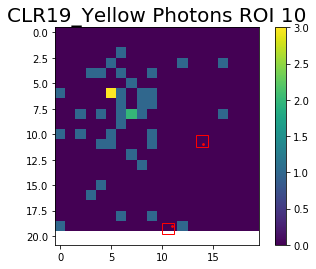

info message from bfgs algorithm is -1 

CLR19_Yellow Photons ROI 11 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 11 attempt 11: c routine returned info -1, trying again
CLR19_Ye

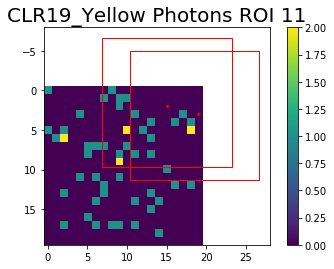

info message from bfgs algorithm is -1 

ROI 12 touches image border, skipping 

CLR19_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 13 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 13 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 13 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 13 attempt 4: c routine returned info 2, trying again
CLR19_Yellow Photons ROI 13 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 13 attempt 6: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 13 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 13 attempt 11: c routin

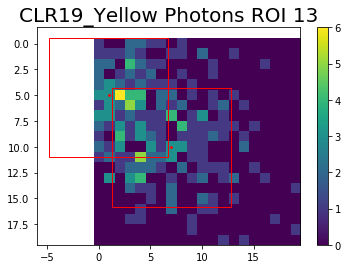

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 14 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 14 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 14 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 14 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 14 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 14 attempt 6: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 14 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 14 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 14 attempt 9: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 14 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 14 attempt 11: c routine returned info 1, trying again
CLR19_Ye

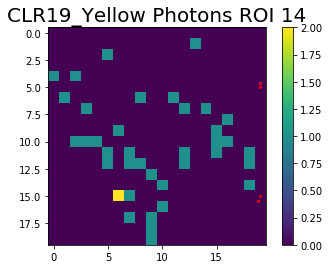

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 15 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 15 attempt 4: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 15 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 15 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 15 attempt 7: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 15 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 15 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 15 attempt 10: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 15 attempt 11: c routine returned info 1, trying again
CLR19_Y

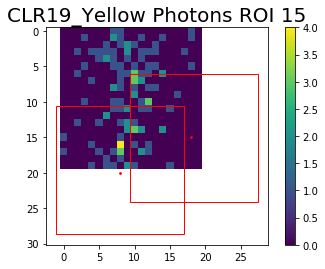

info message from bfgs algorithm is -1 

CLR19_Yellow Photons ROI 16 attempt 0: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 16 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 16 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 16 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 16 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 16 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 16 attempt 8: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 16 attempt 9: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 16 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 16 attempt 11: c routine returned info 1, trying again
CLR19_

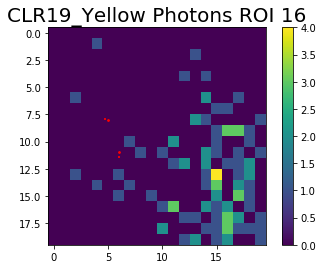

info message from bfgs algorithm is 4 

ROI 17 touches image border, skipping 

CLR19_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 18 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 18 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 18 attempt 6: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 18 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 18 attempt 8: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 18 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 18 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 18 attempt 11: c routin

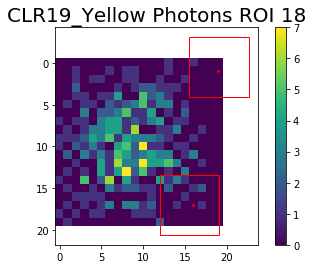

info message from bfgs algorithm is -1 

ROI 19 touches image border, skipping 

ROI 20 touches image border, skipping 

ROI 21 touches image border, skipping 

CLR19_Yellow Photons ROI 22 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 22 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 22 attempt 2: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 22 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 22 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 22 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 22 attempt 6: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 22 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 22 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 22:value of Istar is 0.82 and Istarthreshold is 1.03, success!


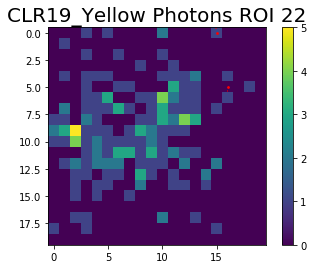

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 8: c routine returned info 2, trying again
CLR19_Yellow Photons ROI 23 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 23 attempt 11: c routine returned info 1, trying again
CLR19_Yell

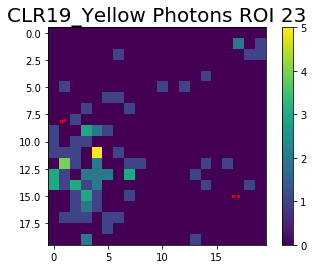

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 24 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 9: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 24 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 24 attempt 11: c routine returned info 1, trying again
CLR19_Yel

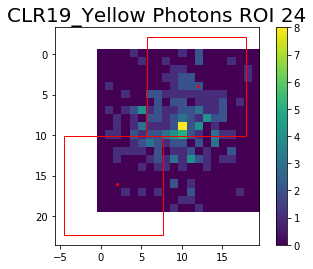

info message from bfgs algorithm is -1 

ROI 25 touches image border, skipping 

CLR19_Yellow Photons ROI 26 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 26 attempt 1: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 26 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 26:value of Istar is 0.72 and Istarthreshold is 1.08, success!


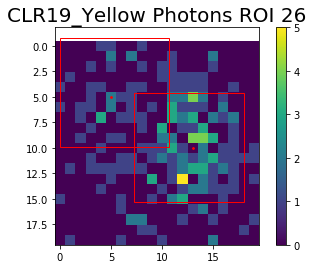

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 27 attempt 0: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 27 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 27 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 27 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 27 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 27:value of Istar is 0.69 and Istarthreshold is 0.99, success!


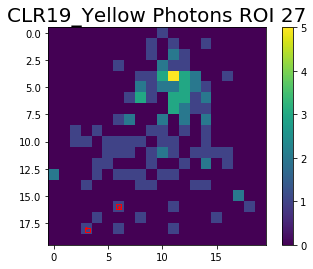

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 28 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 28 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 28 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 28 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 28 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 28 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 28 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 28 attempt 7: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 28:value of Istar is 0.96 and Istarthreshold is 1.01, success!


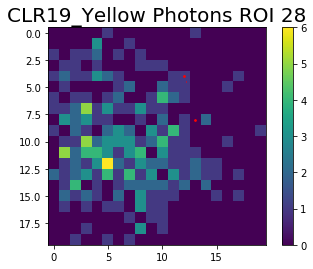

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 29 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 29 attempt 11: c routine returned info 1, trying again
CLR19_Yell

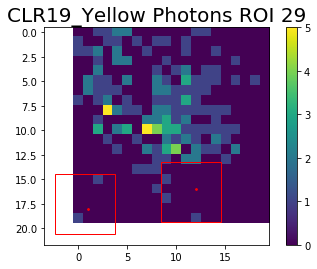

info message from bfgs algorithm is -1 

ROI 30 touches image border, skipping 

ROI 31 touches image border, skipping 

CLR19_Yellow Photons ROI 32 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 32 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 32:value of Istar is 0.58 and Istarthreshold is 1.01, success!


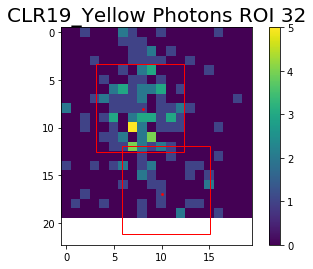

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 33 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 33 attempt 1: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 33 attempt 2: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 33 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 33 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 33 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 33 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 33 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 33 attempt 8: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 33 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 33 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 33 attempt 11: c routine returned info -1, trying again
CLR19_

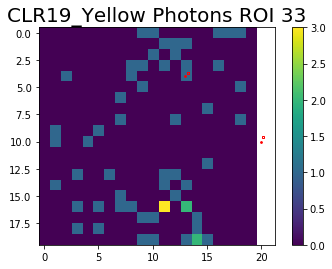

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 34 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 34 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 34 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 34 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 34 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 34:value of Istar is 0.95 and Istarthreshold is 1.14, success!


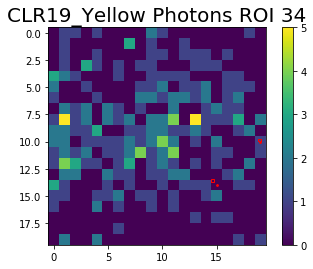

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 35 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 35 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 35 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 35 attempt 3: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 35 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 35 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 35 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 35 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 35 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 35 attempt 9: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 35 attempt 10: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 35 attempt 11: c routine returned info 1, trying again
CLR19_Y

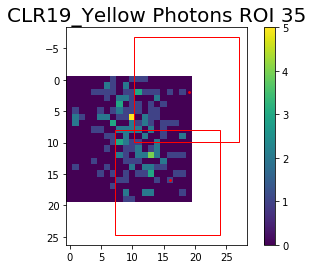

info message from bfgs algorithm is -1 

ROI 36 touches image border, skipping 

CLR19_Yellow Photons ROI 37 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 37 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 37 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 37 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 37 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 37 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 37 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 37 attempt 7: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 37 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 37 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 37 attempt 10: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 37 attempt 11: c routi

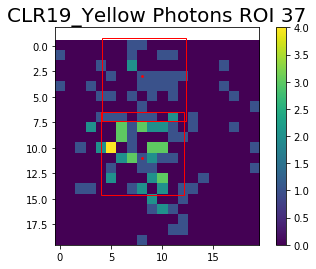

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 38 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 1: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 38 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 38 attempt 11: c routine returned info 1, trying again
CLR19_Yel

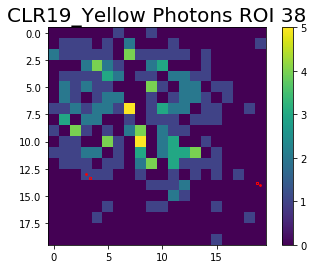

info message from bfgs algorithm is 4 

ROI 39 touches image border, skipping 

CLR19_Yellow Photons ROI 40 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 40 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 40 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 40 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 40 attempt 4: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 40 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 40 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 40 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 40 attempt 8: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 40 attempt 9: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 40 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 40 attempt 11: c routi

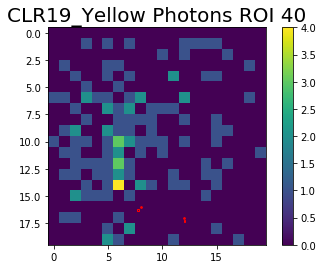

info message from bfgs algorithm is 4 

ROI 41 touches image border, skipping 

CLR19_Yellow Photons ROI 42 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 42 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 42 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 42 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 42 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 42 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 42 attempt 6: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 42 attempt 7: c routine returned info 2, trying again
CLR19_Yellow Photons ROI 42 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 42 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 42 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 42 attempt 11: c routine

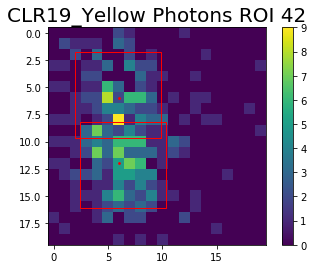

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 43 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 43 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 43 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 43 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 43 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 43 attempt 5: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 43 attempt 6: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 43 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 43 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 43 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 43 attempt 10: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 43 attempt 11: c routine returned info 1, trying again
CLR19_Y

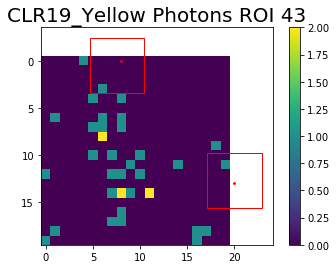

info message from bfgs algorithm is -1 

CLR19_Yellow Photons ROI 44 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 3: c routine returned info 2, trying again
CLR19_Yellow Photons ROI 44 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 7: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 44 attempt 11: c routine returned info 1, trying again
CLR19_Yel

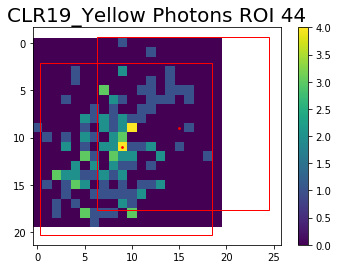

info message from bfgs algorithm is -1 

CLR19_Yellow Photons ROI 45 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 45 attempt 1: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 45 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 45 attempt 3: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 45 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 45 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 45 attempt 6: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 45 attempt 7: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 45 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 45 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 45 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 45 attempt 11: c routine returned info 1, trying again
CLR19

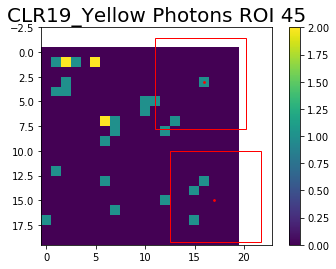

info message from bfgs algorithm is -1 

CLR19_Yellow Photons ROI 46 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 46 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 46 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 46 attempt 3: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 46 attempt 4: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 46 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 46:value of Istar is 0.43 and Istarthreshold is 0.93, success!


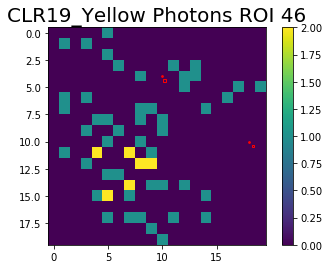

info message from bfgs algorithm is 4 

CLR19_Yellow Photons ROI 47 attempt 0: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 47 attempt 1: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 47 attempt 2: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 47 attempt 3: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 47 attempt 4: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 47 attempt 5: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 47 attempt 6: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 47 attempt 7: c routine returned info -1, trying again
CLR19_Yellow Photons ROI 47 attempt 8: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 47 attempt 9: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 47 attempt 10: c routine returned info 1, trying again
CLR19_Yellow Photons ROI 47 attempt 11: c routine returned info 1, trying again
CLR19_Ye

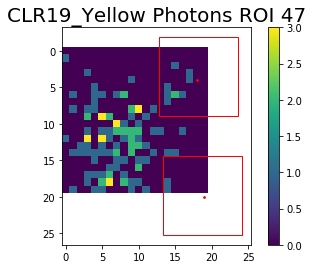

info message from bfgs algorithm is -1 

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR20.txt'
number of records is 3684276
CLR20_Yellow Photons ROI 0 attempt 0: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 0 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 0 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 0 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 0 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 0 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 0 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 0 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 0 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 0 attempt 9: c routine returned info -1, trying again


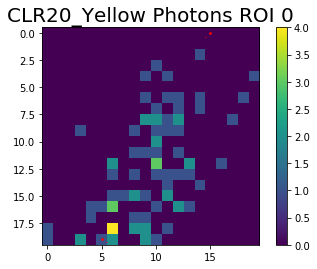

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 1:value of Istar is 0.71 and Istarthreshold is 0.98, success!


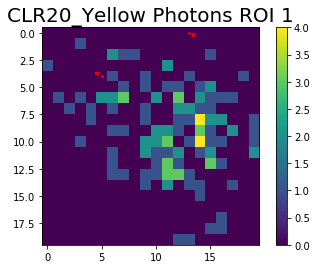

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 2 attempt 0: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 2 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 2 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 2 attempt 3: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 2 attempt 4: c routine returned info 2, trying again
CLR20_Yellow Photons ROI 2 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 2 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 2 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 2 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 2 attempt 9: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 2 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 2 attempt 11: c routine returned info 1, trying again
CLR20_Yellow Photon

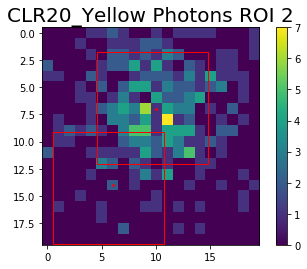

info message from bfgs algorithm is -1 

ROI 3 touches image border, skipping 

ROI 4 touches image border, skipping 

CLR20_Yellow Photons ROI 5 attempt 0: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 5 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 5 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 5 attempt 3: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 5 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 5 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 5 attempt 6: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 5 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 5 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 5 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 5 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photo

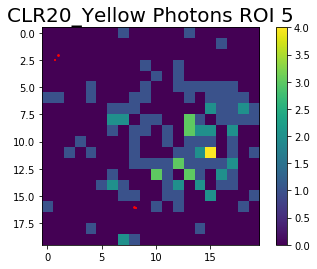

info message from bfgs algorithm is -1 

CLR20_Yellow Photons ROI 6 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 7: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 6 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 6 attempt 11: c routine returned info 1, trying again
CLR20_Yellow Photons

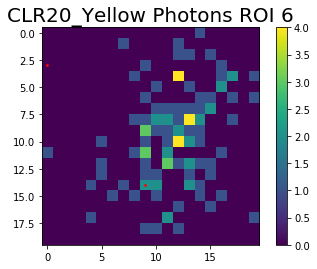

info message from bfgs algorithm is 4 

ROI 7 touches image border, skipping 

CLR20_Yellow Photons ROI 8 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 8 attempt 11: c routine returned info

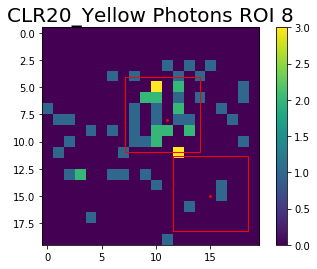

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 9 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 9:value of Istar is 0.50 and Istarthreshold is 0.96, success!


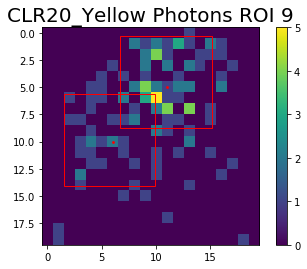

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 10 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 2: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 10 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 10 attempt 11: c routine returned info 1, trying again
CLR20_Yel

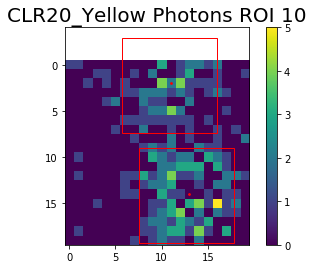

info message from bfgs algorithm is 4 

ROI 11 touches image border, skipping 

CLR20_Yellow Photons ROI 12:value of Istar is 0.79 and Istarthreshold is 0.96, success!


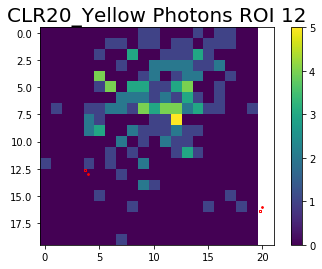

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 13 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 13 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 13 attempt 2: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 13 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 13 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 13 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 13 attempt 6: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 13 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 13 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 13 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 13 attempt 10: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 13 attempt 11: c routine returned info 1, trying again
CLR20_Y

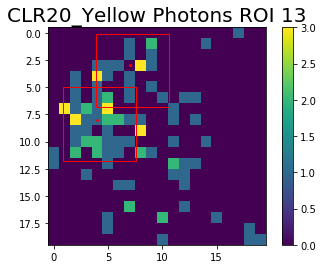

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 14 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 14 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 14 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 14 attempt 3: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 14 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 14 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 14 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 14 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 14 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 14 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 14 attempt 10: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 14 attempt 11: c routine returned info 1, trying again
CLR20_Y

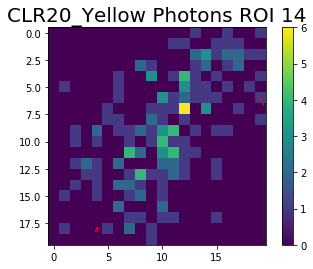

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 15 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 15 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 15 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 15 attempt 3: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 15 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 15 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 15 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 15 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 15 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 15 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 15 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 15 attempt 11: c routine returned info 1, trying again
CLR20_Ye

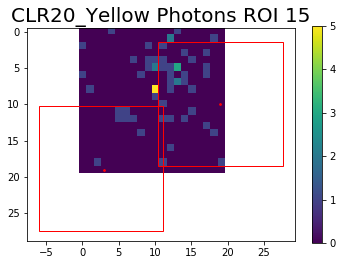

info message from bfgs algorithm is -1 

CLR20_Yellow Photons ROI 16 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 16 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 16 attempt 2: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 16 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 16 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 16 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 16 attempt 6: c routine returned info 2, trying again
CLR20_Yellow Photons ROI 16 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 16:value of Istar is 0.63 and Istarthreshold is 0.97, success!


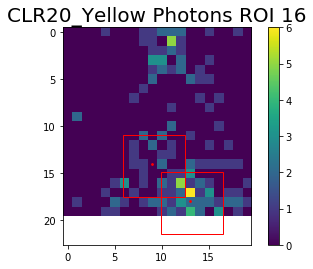

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 17 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 17 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 17 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 17 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 17 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 17 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 17 attempt 6: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 17 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 17 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 17 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 17 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 17 attempt 11: c routine returned info 1, trying again
CLR20_Ye

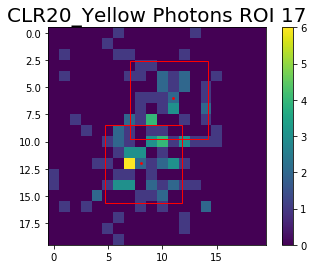

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 18 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 2: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 18 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 18 attempt 11: c routine returned info 1, trying again
CLR20_Yel

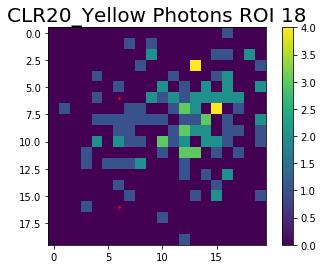

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 19 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 19 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 19 attempt 2: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 19 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 19 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 19 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 19 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 19 attempt 7: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 19 attempt 8: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 19 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 19 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 19 attempt 11: c routine returned info 1, trying again
CLR20_

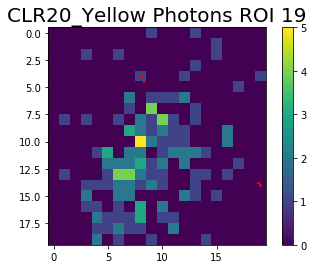

info message from bfgs algorithm is 4 

ROI 20 touches image border, skipping 

CLR20_Yellow Photons ROI 21 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 21 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 21 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 21:value of Istar is 0.53 and Istarthreshold is 1.01, success!


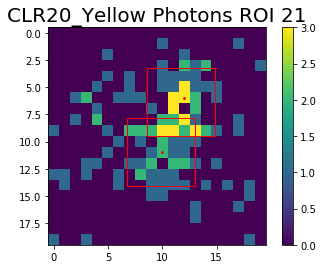

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 22 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 22 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 22 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 22 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 22 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 22 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 22 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 22 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 22 attempt 8: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 22 attempt 9: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 22 attempt 10: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 22 attempt 11: c routine returned info 1, trying again
CLR20_Y

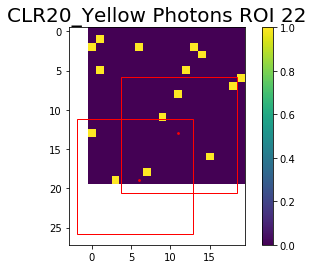

info message from bfgs algorithm is -1 

CLR20_Yellow Photons ROI 23 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 23 attempt 1: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 23 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 23 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 23 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 23 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 23 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 23 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 23 attempt 8: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 23 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 23 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 23 attempt 11: c routine returned info 1, trying again
CLR20_Y

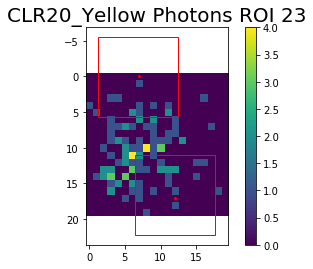

info message from bfgs algorithm is -1 

CLR20_Yellow Photons ROI 24 attempt 0: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 24 attempt 1: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 24 attempt 2: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 24 attempt 3: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 24 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 24 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 24 attempt 6: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 24 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 24 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 24 attempt 9: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 24 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 24 attempt 11: c routine returned info 1, trying again
CL

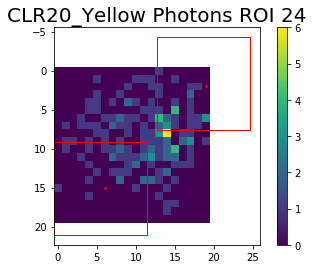

info message from bfgs algorithm is -1 

CLR20_Yellow Photons ROI 25 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 9: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 25 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 25 attempt 11: c routine returned info 1, trying again
CLR20_Ye

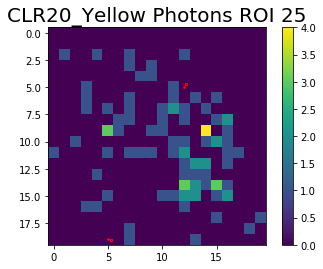

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 26 attempt 0: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 26 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 26 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 26 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 26 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 26 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 26 attempt 6: c routine returned info 2, trying again
CLR20_Yellow Photons ROI 26 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 26 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 26 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 26 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 26 attempt 11: c routine returned info 1, trying again
CLR20_Ye

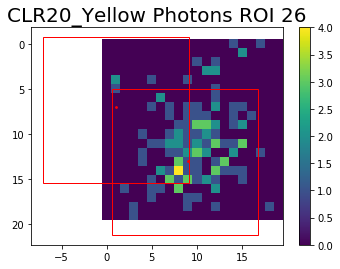

info message from bfgs algorithm is -1 

CLR20_Yellow Photons ROI 27 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 27 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 27 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 27 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 27 attempt 4: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 27 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 27 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 27 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 27 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 27 attempt 9: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 27 attempt 10: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 27 attempt 11: c routine returned info 1, trying again
CLR20_

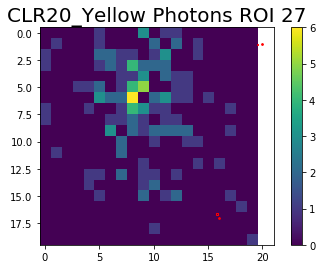

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 28 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 28 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 28 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 28 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 28 attempt 4: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 28 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 28:value of Istar is 0.74 and Istarthreshold is 0.99, success!


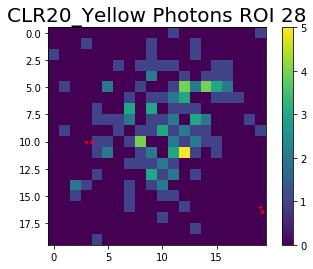

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 29 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 7: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 29 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 29 attempt 11: c routine returned info 1, trying again
CLR20_Yel

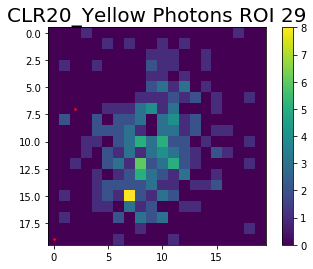

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 30 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 30:value of Istar is 0.83 and Istarthreshold is 1.05, success!


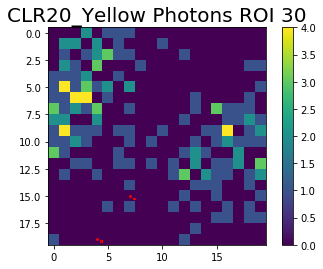

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 31 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 31 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 31 attempt 2: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 31 attempt 3: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 31 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 31 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 31 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 31 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 31 attempt 8: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 31 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 31 attempt 10: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 31 attempt 11: c routine returned info 1, trying again
CLR20_Y

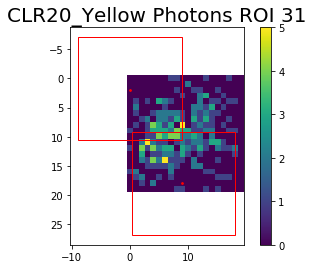

info message from bfgs algorithm is -1 

CLR20_Yellow Photons ROI 32 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 32 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 32 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 32 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 32 attempt 4: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 32 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 32 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 32 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 32 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 32 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 32 attempt 10: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 32 attempt 11: c routine returned info 1, trying again
CLR20_Y

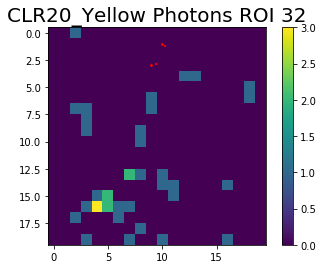

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 33:value of Istar is 0.39 and Istarthreshold is 0.90, success!


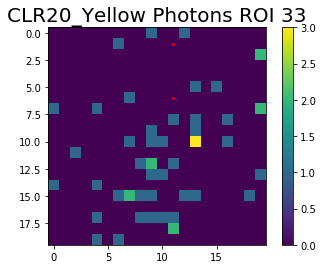

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 34 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 34 attempt 1: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 34 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 34 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 34 attempt 4: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 34 attempt 5: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 34 attempt 6: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 34:value of Istar is 0.84 and Istarthreshold is 1.04, success!


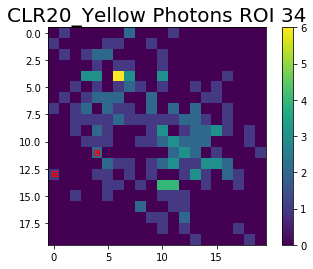

info message from bfgs algorithm is 4 

CLR20_Yellow Photons ROI 35 attempt 0: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 35 attempt 1: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 35 attempt 2: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 35 attempt 3: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 35 attempt 4: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 35 attempt 5: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 35 attempt 6: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 35 attempt 7: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 35 attempt 8: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 35 attempt 9: c routine returned info 1, trying again
CLR20_Yellow Photons ROI 35 attempt 10: c routine returned info -1, trying again
CLR20_Yellow Photons ROI 35 attempt 11: c routine returned info 1, trying again
CLR20_Ye

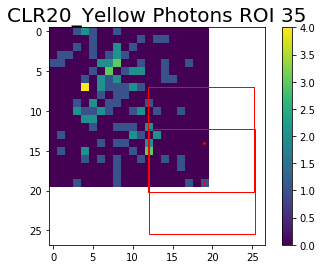

info message from bfgs algorithm is -1 

ROI 36 touches image border, skipping 



In [4]:
wdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct'
ROIDir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\Exported Images\ROIs'
ntacs = 256
model = 'two2DGaussian_c'
paramlst_py = []
for i, file in enumerate(files):
    if file[-4:] != '.ptu':
        continue
    fname = os.path.join(wdir, file).encode()
    CLR = IM.processLifetimeImage(fname, uselines = np.array([1,2]), ntacs = ntacs)
    CLR.loadLifetime()
    CLR.gate(32,150)
    CLR.loadIntensity()
    
    ROIfile = os.path.join(ROIDir, roifiles[i])
    roiSize = 20
    image = CLR.workIntensity.G
#    outdir = os.path.join(wdir, file[:-4])
    outdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\Exported Images\ROIsC_G'
    outname = file[:-4] + '_Green Photons.roi'
    paramlst_py.append(fitNrois(image, ROIfile, model, roiSize, outdir, showfig = True, savefig = False))

In [183]:
np.savetxt('20191018params_MLE_2Gaussian.txt', fits)

In [54]:
entries = 0
for el in paramlst:
    entries += len(el)
fits = np.zeros((entries, 17))
i = 0
for el in paramlst:
    fits[i: i + len(el)] = el
    i+= len(el)
#fits = np.array(paramlst)
#shape = fits.shape
#fits = fits.reshape((shape[0] * shape[1], 17))

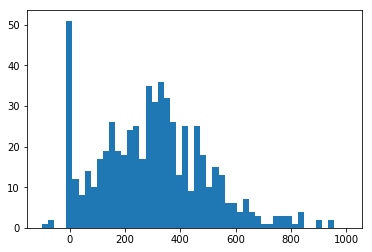

In [147]:
Nlim = 100
Ncounts = np.concatenate((fits[:,2]* 2 * np.pi * fits[:,3]**2, fits[:,8]* 2 * np.pi * fits[:,3]**2))
plt.hist(Ncounts, bins = 50, range = (-100,1000))
lowcnts = [l  > Nlim and r > Nlim and s for l, r, s in 
           zip(fits[:,2]* 2 * np.pi * fits[:,3]**2, fits[:,8]* 2 * np.pi * fits[:,3]**2, fits[:,3] < 4)]

C:\Users\voort\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


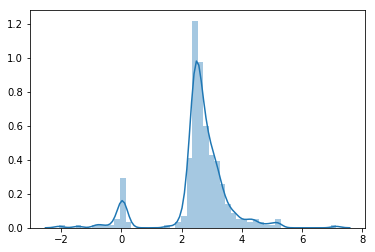

In [145]:
sns.distplot(fits[:,3])

<function matplotlib.pyplot.show(*args, **kw)>

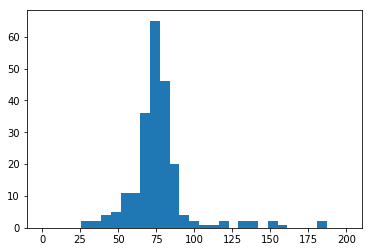

In [148]:
fits_filt = fits[lowcnts]
p2p_filt = np.sqrt((fits_filt[:,0] - fits_filt[:, 6]) ** 2 + (fits_filt[:,1] - fits_filt[:, 7]) ** 2) * a
plt.hist(p2p_filt, bins = 31, range = (0, 200))
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

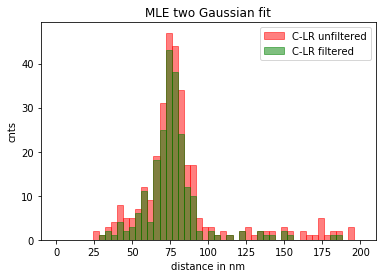

In [181]:
a = 10
p2p = np.sqrt((fits[:,0] - fits[:, 6]) ** 2 + (fits[:,1] - fits[:, 7]) ** 2) * a
plt.hist(p2p, bins = 50, range = (0, 200), label = 'C-LR unfiltered', alpha = 0.5, Color = 'r')

fits_filt = fits[lowcnts]
p2p_filt = np.sqrt((fits_filt[:,0] - fits_filt[:, 6]) ** 2 + (fits_filt[:,1] - fits_filt[:, 7]) ** 2) * a
plt.hist(p2p_filt, bins = 50, range = (0, 200), label = 'C-LR filtered', alpha = 0.5, Color = 'g')
plt.legend()
plt.title('MLE two Gaussian fit')
plt.xlabel('distance in nm')
plt.ylabel('cnts')
plt.savefig('20191018CLR_twoGaussian_MLE', dpi = 300, bbox_inches = 'tight')
plt.show


In [163]:
sns.distplot?

C:\Users\voort\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\voort\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


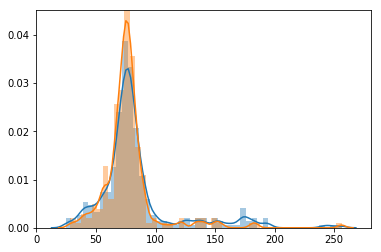

In [164]:
import seaborn as sns
sns.distplot(p2p, norm_hist = True, label = 'unfiltered')
sns.distplot(p2p_filt, norm_hist = True, label = 'filtered')
#sns.legend()

In [6]:
roifiles = ['CLR1_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR5_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR6_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR7_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR8_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR9_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR10_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR11_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR18_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR19_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi',
           'CLR20_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi']

In [8]:
wdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct'
ROIDir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble_sep\NF_population\Pixel numbers of selected ROIs'
outdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble_sep\NF_population'
ntacs = 1024
NF_decay = np.zeros((ntacs, 3))
for i, file in enumerate(files):
    fname = os.path.join(wdir, file).encode()
    CLR = IM.processLifetimeImage(fname, uselines = np.array([1,2]), ntacs = ntacs)
    CLR.loadLifetime()
    CLR.loadIntensity()
    roifile = roifiles[i]

    ROIS = np.genfromtxt(os.path.join(ROIDir,roifile)).astype(np.int32)
    mask = IM.processLifetimeImage.buildMaskFromROI(CLR, ROIS)
    CLR.mask(mask, mode = 'lifetime')
    CLR.sumLifetime()
    NF_decay[:,0] += CLR.decay.G
    NF_decay[:,1] += CLR.decay.R
    NF_decay[:,2] += CLR.decay.Y
np.savetxt(os.path.join( outdir, r'NF_G.dat'), NF_decay[:,0], fmt = '%d', delimiter = '\n')
np.savetxt(os.path.join( outdir, r'NF_R.dat'), NF_decay[:,1], fmt = '%d', delimiter = '\n')
np.savetxt(os.path.join( outdir, r'NF_Y.dat'), NF_decay[:,2], fmt = '%d', delimiter = '\n')

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR1.txt'
number of records is 3209698
N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\header\CLR1.txt
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR5.txt'
number of records is 3644669
N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\header\CLR5.txt
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR6.txt'
number of records is 3681173
N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\header\CLR6.txt
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR7.txt'

In [12]:
wdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct'
ROIDir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble_sep\MF_population\Pixel numbers of selected ROIs'
outdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble_sep\MF_population'
ntacs = 1024
NF_decay = np.zeros((ntacs, 3))
for i, file in enumerate(files):
    fname = os.path.join(wdir, file).encode()
    CLR = IM.processLifetimeImage(fname, uselines = np.array([1,2]), ntacs = ntacs)
    CLR.loadLifetime()
    CLR.loadIntensity()
    roifile = roifiles[i]

    ROIS = np.genfromtxt(os.path.join(ROIDir,roifile)).astype(np.int32)
    mask = IM.processLifetimeImage.buildMaskFromROI(CLR, ROIS)
    CLR.mask(mask, mode = 'lifetime')
    CLR.sumLifetime()
    NF_decay[:,0] += CLR.decay.G
    NF_decay[:,1] += CLR.decay.R
    NF_decay[:,2] += CLR.decay.Y
np.savetxt(os.path.join( outdir, r'MF_G.dat'), NF_decay[:,0], fmt = '%d', delimiter = '\n')
np.savetxt(os.path.join( outdir, r'MF_R.dat'), NF_decay[:,1], fmt = '%d', delimiter = '\n')
np.savetxt(os.path.join( outdir, r'MF_Y.dat'), NF_decay[:,2], fmt = '%d', delimiter = '\n')

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR1.txt'
number of records is 3209698
N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\header\CLR1.txt
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR5.txt'
number of records is 3644669
N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\header\CLR5.txt
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR6.txt'
number of records is 3681173
N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\header\CLR6.txt
header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR7.txt'

In [15]:
roifiles = ['CLR9_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi']
files = ['CLR9.ptu']
wdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct'
ROIDir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble_sep\MF_population\Pixel numbers of selected ROIs'
ntacs = 256

for i, file in enumerate(files):
    fname = os.path.join(wdir, file).encode()
    CLR = IM.processLifetimeImage(fname, uselines = np.array([1,2]), ntacs = ntacs)
    CLR.loadLifetime()
    CLR.gate(32,150)
    CLR.loadIntensity()
    
    ROIfile = os.path.join(ROIDir, roifiles[i])
    ROIS = np.genfromtxt(ROIfile).astype(np.int32)
    mask = IM.processLifetimeImage.buildMaskFromROI(CLR, ROIS)
    CLR.mask(mask, mode = 'intensity')

header dir already exists
b'N:\\Singlem\\singlem19-4\\october\\18_CLR_origamis_NV\\ensemble_exc561_50pct_exc640_5pct_STED40pct\\header\\CLR9.txt'
number of records is 3495674
N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\header\CLR9.txt


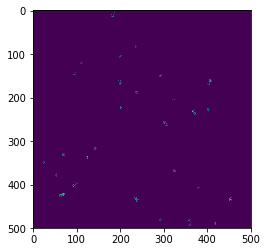

In [22]:
roifiles = ['CLR9_Frames   0- 99_Green_Fit#23__MinPh# 0_MaxPh# Inf_0_ROI size ±3.roi']
ROIDir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble_sep\MF_population\Pixel numbers of selected ROIs'
CLR.loadIntensity()
ROIfile = os.path.join(ROIDir, roifiles[i])
ROIS = np.genfromtxt(ROIfile).astype(np.int32)
mask = IM.processLifetimeImage.buildMaskFromROI(CLR, ROIS)
CLR.mask(mask, mode = 'intensity')
MF = CLR.workIntensity.G

ROIDir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble_sep\NF_population\Pixel numbers of selected ROIs'
CLR.loadIntensity()
ROIfile = os.path.join(ROIDir, roifiles[i])
ROIS = np.genfromtxt(ROIfile).astype(np.int32)
mask = IM.processLifetimeImage.buildMaskFromROI(CLR, ROIS)
CLR.mask(mask, mode = 'intensity')
NF = CLR.workIntensity.G

plt.imsave()

In [31]:
from PIL import Image
outdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble_sep'
MFimage = Image.fromarray(MF)
MFimage.save(os.path.join(outdir, 'MF.tiff'))
NFimage = Image.fromarray(NF)
NFimage.save(os.path.join(outdir, 'NF.tiff'))

In [538]:
def sumdatfiles(wdir):
    os.chdir(wdir)
    files = os.listdir()

    for f in files:
        if f[-4:] == '.dat':
            try:
                tacPS += np.genfromtxt(f)
            except NameError:
                tacPS = np.genfromtxt(f)
    try: 
        os.mkdir('sum')
    except:
        pass
    np.savetxt(r'sum\sum.dat', tacPS, fmt = '%i')
    return tacPS

In [541]:
wdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble\MixedPopulation_TACS\Green Photons'
sumdatfiles(wdir)
wdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ensemble_exc561_50pct_exc640_5pct_STED40pct\sub_ensemble\HFpopulation_TACS'
sumdatfiles(wdir)

array([0., 0., 0., ..., 0., 0., 0.])

In [553]:
wdir = r'N:\Singlem\singlem19-4\october\18_CLR_origamis_NV\ref'
files = ['IRF_ery_561_5KHz_clean_G_PS.dat',
        'IRF_ery_561_5KHz+5MKI_dirty_G_PS.dat',
        'IRF_ery_561_stock_50KHz_verydirty_G_PS.dat']
clean5kHz = np.genfromtxt(os.path.join(wdir, files[0]))
KI5kHz = np.genfromtxt(os.path.join(wdir, files[1]))
stock50kHz = np.genfromtxt(os.path.join(wdir, files[2]))

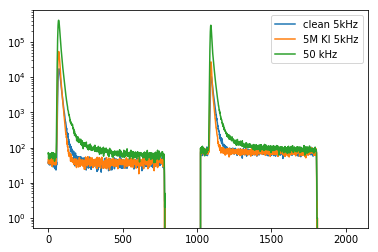

In [555]:
plt.plot(clean5kHz, label = 'clean 5kHz')
plt.plot(KI5kHz, label = '5M KI 5kHz')
plt.plot(stock50kHz, label = '50 kHz')
ax = plt.gca()
ax.set_yscale('log')
plt.legend()